# Mounting drive for file access



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Dependencies

In [2]:
!pip install python-dateutil


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install import-ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install -U -q PyDrive


# Libraries

In [5]:
#%%
#LIBRARIES
#Custom Library Connection
import sys
import os
import import_ipynb
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Data Processing
import pandas as pd
import numpy as np
import math

import datetime

#Table Formatter
from google.colab.data_table import DataTable
DataTable.max_columns = 50

#Plots
import matplotlib.pyplot as plt
import matplotlib.dates
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

#Fourier Transform
from scipy.fft import fft
from scipy.signal import find_peaks

#LSTM
from statsmodels.tsa.seasonal import seasonal_decompose #seasonality
from statsmodels.graphics.tsaplots import plot_acf #acf


import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator


np.random.seed(1)
tf.random.set_seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

#Anomaly Detection
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importing Custom Libraries

In [6]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [7]:
module_models = drive.CreateFile({'id':'1derReHVn0P30RFlGd1TJ_IYd0RzidwCN'})
module_models.GetContentFile('models.ipynb')
module_models

GoogleDriveFile({'id': '1derReHVn0P30RFlGd1TJ_IYd0RzidwCN', 'kind': 'drive#file', 'etag': '"MTY0Nzk2NTMxMDU2OQ"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1derReHVn0P30RFlGd1TJ_IYd0RzidwCN', 'webContentLink': 'https://drive.google.com/uc?id=1derReHVn0P30RFlGd1TJ_IYd0RzidwCN&export=download', 'alternateLink': 'https://colab.research.google.com/drive/1derReHVn0P30RFlGd1TJ_IYd0RzidwCN', 'embedLink': 'https://drive.google.com/file/d/1derReHVn0P30RFlGd1TJ_IYd0RzidwCN/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/vnd.google.colaboratory', 'thumbnailLink': 'https://lh3.googleusercontent.com/xUgDk6DjFAOrAHczh3s_erKldXy5UpwdP13d6DjAIBEMBDFrmELmLa4TzyEW2D7j_0P2gtjlVZXhSh0=s220', 'title': 'models.ipynb', 'mimeType': 'application/vnd.google.colaboratory', 'description': 'Colaboratory notebook', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': F

In [8]:
from models import*

importing Jupyter notebook from models.ipynb
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
split_value(pd.DataFrame(np.random.randint(0,100,size=(10, 3)), columns=list('ABC')) ,2)

(    A   B   C
 0  37  12  72
 1   9  75   5
 2  79  64  16
 3   1  76  71
 4   6  25  50
 5  20  18  84
 6  11  28  29
 7  14  50  68,     A   B   C
 8  87  87  94
 9  96  86  13)

In [10]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [11]:
module_helper = drive.CreateFile({'id':'18rMYExGP6aHMSVHValrZjXfb_7ll-T4v'})
module_helper.GetContentFile('helperFunctions.ipynb')
module_helper

GoogleDriveFile({'id': '18rMYExGP6aHMSVHValrZjXfb_7ll-T4v', 'kind': 'drive#file', 'etag': '"MTY0ODc5OTM2NjYzNg"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/18rMYExGP6aHMSVHValrZjXfb_7ll-T4v', 'webContentLink': 'https://drive.google.com/uc?id=18rMYExGP6aHMSVHValrZjXfb_7ll-T4v&export=download', 'alternateLink': 'https://colab.research.google.com/drive/18rMYExGP6aHMSVHValrZjXfb_7ll-T4v', 'embedLink': 'https://drive.google.com/file/d/18rMYExGP6aHMSVHValrZjXfb_7ll-T4v/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/vnd.google.colaboratory', 'title': 'helperFunctions.ipynb', 'mimeType': 'application/vnd.google.colaboratory', 'description': 'Colaboratory notebook', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2022-03-09T08:17:39.034Z', 'modifiedDate': '2022-04-01T07:49:26.636Z', 'modifiedByMeDate': '2022-04-01T07:49

In [12]:
from helperFunctions import*

importing Jupyter notebook from helperFunctions.ipynb
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
uniqueValues([1,1,1,12,2,2,3])

{1: 3, 2: 2, 3: 1, 12: 1}

# General Information about Data

In [14]:

#%%
#Reading Data from CSV 
path="/content/gdrive/My Drive/Thesis-Project/data/formatted_whole.csv"
df = pd.read_csv(path)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,21,22,23,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Session ID,User ID,Event Name,Elapsed Time,Nome Componente,Inizio Caricamento,Fine Caricamento,Descrizione Evento,Stack Trace,...,Errore,Path Errore,Custom Field Errore,Status Errore,Messaggio Errore,Exception,date,h,day_name,memory_flag
0,105041,2872635,748994,748994,NaN,NaN,NaN,NaN,Set User ID,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
1,105042,2872636,748994,Home,53.0,Load Agenda from storage,2022-02-01 00:00:24 +0000,2022-02-01 00:00:24 +0000,Load Agenda from storage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
2,105044,2872637,748994,Home,7.0,Load HomePage KPI from storage,2022-02-01 00:00:25 +0000,2022-02-01 00:00:25 +0000,Load HomePage KPI from storage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
3,105045,2872638,748994,Contacts,4.0,Load contacts GDP from storage,2022-02-01 00:00:25 +0000,2022-02-01 00:00:25 +0000,Load contacts GDP from storage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
4,105046,2872639,748994,Home,968.0,Load Tasks from storage,2022-02-01 00:00:24 +0000,2022-02-01 00:00:25 +0000,Load Tasks from storage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474937,1470945,4347572,672590,Home,5668.0,Load Tasks from service,2022-02-28 23:59:35 +0000,2022-02-28 23:59:41 +0000,Load Tasks from service,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-28,23,Monday,-2
1474938,1470943,4347573,672590,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,...,NaN,NaN,NaN,401.0,Http failure response for https://apigateway.g...,NaN,2022-02-28,23,Monday,-2
1474939,1470946,4347574,672590,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,...,NaN,NaN,SafeClockPianoAzioneService-pdaRequest,NaN,NaN,NaN,2022-02-28,23,Monday,-2
1474940,1470948,4347575,672590,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,...,Forbidden,/kpi/detail/5,DashboardDetailService-createLogFn,403.0,No message available,java.lang.reflect.UndeclaredThrowableException,2022-02-28,23,Monday,-2


# Formatting Dataframe

In [15]:
#Formatting DF
#Convert dataframe "Timestamp" column from string to datetime type of object, therefore we can simplify problem as a timeseries prediction, 
#also timestamp is a unique value in our table that we can analyze data based on it

#df['Timestamp'] = [parser.parse(df["Timestamp"].iloc[i]) for i in range(len(df)) ]
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values(by='Timestamp') #Can be changed to Session ID

df = df.drop('Unnamed: 0',axis=1)
df = df.reset_index(drop=True)


In [16]:
df

,Session ID,User ID,Event Name,Elapsed Time,Nome Componente,Inizio Caricamento,Fine Caricamento,Descrizione Evento,Stack Trace,Tipo Evento,...,Errore,Path Errore,Custom Field Errore,Status Errore,Messaggio Errore,Exception,date,h,day_name,memory_flag
0,2872635,748994,748994,NaN,NaN,NaN,NaN,Set User ID,NaN,loginSuccess,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
1,2872636,748994,Home,53.0,Load Agenda from storage,2022-02-01 00:00:24 +0000,2022-02-01 00:00:24 +0000,Load Agenda from storage,NaN,pageLoadTime,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
2,2872637,748994,Home,7.0,Load HomePage KPI from storage,2022-02-01 00:00:25 +0000,2022-02-01 00:00:25 +0000,Load HomePage KPI from storage,NaN,pageLoadTime,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
3,2872638,748994,Contacts,4.0,Load contacts GDP from storage,2022-02-01 00:00:25 +0000,2022-02-01 00:00:25 +0000,Load contacts GDP from storage,NaN,pageLoadTime,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
4,2872639,748994,Home,968.0,Load Tasks from storage,2022-02-01 00:00:24 +0000,2022-02-01 00:00:25 +0000,Load Tasks from storage,NaN,pageLoadTime,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-01,0,Tuesday,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474937,4347572,672590,Home,5668.0,Load Tasks from service,2022-02-28 23:59:35 +0000,2022-02-28 23:59:41 +0000,Load Tasks from service,NaN,pageLoadTime,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-02-28,23,Monday,-2
1474938,4347573,672590,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,genericEvent,...,NaN,NaN,NaN,401.0,Http failure response for https://apigateway.g...,NaN,2022-02-28,23,Monday,-2
1474939,4347574,672590,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,genericEvent,...,NaN,NaN,SafeClockPianoAzioneService-pdaRequest,NaN,NaN,NaN,2022-02-28,23,Monday,-2
1474940,4347575,672590,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,genericEvent,...,Forbidden,/kpi/detail/5,DashboardDetailService-createLogFn,403.0,No message available,java.lang.reflect.UndeclaredThrowableException,2022-02-28,23,Monday,-2


## Resample Hourly

In [17]:
df_h = df.set_index('Timestamp').resample('60min').mean()
df_h = df_h.reset_index()

### Handling Missing Values

In [18]:
df_h

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag
0,2022-02-01 00:00:00,2.872708e+06,697080.500000,795139.089552,0.000000,0.0,66.974122,1.155405,NaN,0.0,-2.0
1,2022-02-01 01:00:00,2.872816e+06,747984.000000,987.687500,0.000000,0.0,55.682537,2.880597,NaN,1.0,-2.0
2,2022-02-01 02:00:00,2.872854e+06,693604.000000,249.142857,0.000000,0.0,68.725000,0.000000,NaN,2.0,-2.0
3,2022-02-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-02-01 04:00:00,2.872866e+06,21808.000000,1840.000000,0.000000,0.0,73.976471,4.000000,NaN,4.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...
667,2022-02-28 19:00:00,4.345205e+06,576137.866949,6540.200524,0.117797,0.0,67.097551,1.852542,410.370079,19.0,-2.0
668,2022-02-28 20:00:00,4.346249e+06,583926.396476,30209.639198,0.029736,0.0,61.370595,1.441630,408.434426,20.0,-2.0
669,2022-02-28 21:00:00,4.346928e+06,524553.545657,2043.323144,0.000000,0.0,69.099310,1.630290,411.712121,21.0,-2.0
670,2022-02-28 22:00:00,4.347310e+06,503642.580952,2783.921986,0.000000,0.0,73.652603,1.568254,404.202703,22.0,-2.0


In [19]:
df_h.describe()

,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag
count,6.090000e+02,609.000000,6.040000e+02,609.000000,609.000000,609.000000,609.000000,471.000000,609.000000,609.0
mean,3.647689e+06,541201.997502,4.495583e+04,0.016238,0.000040,66.660944,1.988536,417.711608,12.288998,-2.0
std,4.200359e+05,133313.399779,5.254777e+05,0.029232,0.000476,14.817436,0.680359,20.677997,6.676887,0.0
min,2.872708e+06,3203.000000,5.000000e+00,0.000000,0.000000,28.290000,-1.000000,400.000000,0.000000,-2.0
25%,3.259574e+06,511962.787500,1.474215e+03,0.000000,0.000000,60.345712,1.727273,406.104680,7.000000,-2.0
50%,3.625234e+06,575201.069337,2.163456e+03,0.000000,0.000000,64.742271,2.024607,412.739910,13.000000,-2.0
75%,3.954122e+06,608202.753093,6.088599e+03,0.025855,0.000000,69.735542,2.280303,419.278687,18.000000,-2.0
max,4.347522e+06,748825.000000,1.236109e+07,0.391513,0.010078,185.467042,4.000000,500.000000,23.000000,-2.0


**Sample mean, estimate of correlation:** $\mathbf{c_s(\tau)} = \frac{1}{|V_\tau|} \sum_{t\in V_\tau} s(t) s(t+\tau)$



$\mathbf{V(\tau)}$ = { $t: s(t)$ $and$ $s(t+\tau)$ $are$ $both$ $avaiable$ }

In [20]:
from scipy.stats import spearmanr
v_t =[]

for i in range(len(df_h)):
  if df_h.Timestamp.iloc[i].date() != max(df_h.Timestamp).date(): #Excluding the last day in the data, to avoid index out of range error

    current = df_h[df_h.Timestamp==df_h["Timestamp"].iloc[i]]["Memoria Usata"].values #s(t) = Current value
    next_day_same_time = df_h[df_h.Timestamp==df_h["Timestamp"].iloc[i]+datetime.timedelta(hours=24)]["Memoria Usata"].values #s(t+24hours) = Value which is tracked in next day, at same time 

    if  ~np.isnan(next_day_same_time) and ~np.isnan(current): #if s(t) and s(t+T) are both present, add them to V_t
     v_t.append((next_day_same_time[0])*(current[0]))
     #print("Current: {}, next: {}, = {}".format(current[0], next_day_same_time[0],(next_day_same_time[0])*(current[0])))

In [21]:
len(df_h)

672

In [22]:
len(v_t)

541

In [23]:
c_s = sum(v_t)/len(v_t)
c_s

4527.025750434189

**Variance of Confidence:** $\mathbf{\hat\sigma_{c_s(\tau)}} = \frac{1}{|V_\tau|^2} \sum_{t\in V_\tau} (s(t) s(t+\tau) - c_s(\tau))^2$



In [24]:
variance = (1/len(v_t)**2)*(sum([(v_t[i]-c_s)**2 for i in range(len(v_t))]))

**Confidence Interval:** $(c_s(\tau) - 3\sigma_{c_s(\tau)}, c_s(\tau) + 3\sigma_{c_s(\tau)} )$

In [25]:
standard_deviation = variance**(0.5)
standard_deviation

71.24556020010957

In [26]:
confidenceInterval = [c_s-3*standard_deviation, c_s+3*standard_deviation]
confidenceInterval

[4313.289069833861, 4740.762431034517]

In [27]:
[i**(0.5) for i in confidenceInterval]

[65.67563528306263, 68.85319477725429]

## Cyclostationary Check

cyclostationary mean (with period Tp): m(t) = sum_k x(t-kTp), t in (0,Tp)

cyclostationary correlation r(t,u) = avg_k x(t-kTp) x(t-u-kTp),      t, u in (0,Tp)

cyclostationary correlation r(t,u) = avg_k x(t-kTp) x(t-u-kTp), t in (0,Tp), u in (-Tp/2, Tp/2)

look for peaks in the FFT of your data, they should be at 1/Tp, 2/Tp, ...

### Cyclostationary Mean

In [28]:
from scipy.stats import spearmanr
c_t =[]

for i in range(len(df_h)):
  if df_h.Timestamp.iloc[i].date() != min(df_h.Timestamp).date(): #Excluding the last day in the data, to avoid index out of range error

    current = df_h[df_h.Timestamp==df_h["Timestamp"].iloc[i]]["Memoria Usata"].values #s(t) = Current value
    previous_day_same_time = df_h[df_h.Timestamp==df_h["Timestamp"].iloc[i]-datetime.timedelta(hours=24)]["Memoria Usata"].values #s(t+24hours) = Value which is tracked in next day, at same time 

    if  ~np.isnan(previous_day_same_time) and ~np.isnan(current): #if s(t) and s(t+T) are both present, add them to V_t
     c_t.append((current[0])-(previous_day_same_time[0]))


In [29]:
c_t

[-14.414905734485465,
 3.0766063348416424,
 21.29030354449472,
 8.640177216167487,
 -6.606033827856898,
 3.5022679384094317,
 19.592353841075514,
 46.240852200894665,
 47.43696109700363,
 43.876741678557096,
 -3.1026917132848126,
 19.905891968207328,
 9.108680746861282,
 4.033773806246238,
 -0.21460672029984096,
 2.483494643388866,
 15.57296614456402,
 5.813248553215374,
 3.7972982197831655,
 -3.0384617420097655,
 17.66035678692446,
 -13.375054945054941,
 -9.984825478384124,
 5.2480595300961355,
 6.814872724545388,
 -8.439213738202412,
 -12.04579853257735,
 -0.577427297886544,
 -34.55632561414042,
 -46.515445904219206,
 12.575189956741667,
 -19.775580334151428,
 -5.195498466771113,
 -2.9613833233924893,
 0.5062995518604225,
 -0.9371641471378922,
 -15.687049006305365,
 4.7487956553661235,
 15.475266171314608,
 -5.628688645183566,
 -5.083259496284072,
 2.337357142857144,
 -13.747030075187979,
 -8.17152431153184,
 -3.2585701077287297,
 5.9812295262678745,
 8.915614420299647,
 9.3420853873

In [30]:
len(c_t)

541

In [31]:
len(df_h)

672

In [32]:
c_mean = sum([abs(i) for i in c_t])/len(c_t)
c_mean

10.897235287749307

### Cyclostationary Correlation

In [33]:
from scipy.stats import spearmanr
c_c =[]

for i in range(len(df_h)):
  if df_h.Timestamp.iloc[i].date() != min(df_h.Timestamp).date(): #Excluding the last day in the data, to avoid index out of range error

    current = df_h[df_h.Timestamp==df_h["Timestamp"].iloc[i]]["Memoria Usata"].values #s(t) = Current value
    previous_day_same_time = df_h[df_h.Timestamp==df_h["Timestamp"].iloc[i]-datetime.timedelta(hours=24)]["Memoria Usata"].values #s(t+24hours) = Value which is tracked in next day, at same time 

    if  ~np.isnan(previous_day_same_time) and ~np.isnan(current): #if s(t) and s(t+T) are both present, add them to V_t
     c_c.append((current[0])*(previous_day_same_time[0]))


In [34]:
c_c, len(c_c)

([2297.8864352317364,
  5700.114678733032,
  4658.066191897625,
  3458.5577568582894,
  3319.6653774436563,
  3900.753352886962,
  4952.463113208286,
  6542.324496906707,
  13553.613303277825,
  8010.893800515438,
  3905.444370535578,
  5347.690738456163,
  4533.595130442365,
  4197.50397219896,
  4491.4982942628085,
  4350.267043001477,
  4130.077332994559,
  3762.064220750215,
  2996.530099477982,
  3844.5737812411053,
  3612.8216107235394,
  3283.787120879121,
  5559.343059753721,
  4337.517231662769,
  3331.0279091488137,
  3583.644983052985,
  5562.590555365919,
  11439.48076875791,
  15389.49041245466,
  7709.840267747619,
  4482.901704550031,
  5358.604997043078,
  4815.501445583944,
  4269.178712369693,
  4511.015876974186,
  4454.195899456909,
  4121.803798513267,
  4441.321164069534,
  4088.747507632121,
  3320.1764669819327,
  4487.962212200659,
  5669.600931428572,
  1900.4058015037594,
  4293.200163349828,
  4473.8691042433065,
  4114.443581301393,
  3610.2245565756316,
  

In [35]:
c_corr = sum(c_c)/len(c_c)
c_corr

4527.025750434189

In [36]:
df_h

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag
0,2022-02-01 00:00:00,2.872708e+06,697080.500000,795139.089552,0.000000,0.0,66.974122,1.155405,NaN,0.0,-2.0
1,2022-02-01 01:00:00,2.872816e+06,747984.000000,987.687500,0.000000,0.0,55.682537,2.880597,NaN,1.0,-2.0
2,2022-02-01 02:00:00,2.872854e+06,693604.000000,249.142857,0.000000,0.0,68.725000,0.000000,NaN,2.0,-2.0
3,2022-02-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-02-01 04:00:00,2.872866e+06,21808.000000,1840.000000,0.000000,0.0,73.976471,4.000000,NaN,4.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...
667,2022-02-28 19:00:00,4.345205e+06,576137.866949,6540.200524,0.117797,0.0,67.097551,1.852542,410.370079,19.0,-2.0
668,2022-02-28 20:00:00,4.346249e+06,583926.396476,30209.639198,0.029736,0.0,61.370595,1.441630,408.434426,20.0,-2.0
669,2022-02-28 21:00:00,4.346928e+06,524553.545657,2043.323144,0.000000,0.0,69.099310,1.630290,411.712121,21.0,-2.0
670,2022-02-28 22:00:00,4.347310e+06,503642.580952,2783.921986,0.000000,0.0,73.652603,1.568254,404.202703,22.0,-2.0


### Fourier Transform

In [37]:
df_tmp = df_h[df_h['Memoria Usata'].notna()]
df_tmp

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag
0,2022-02-01 00:00:00,2.872708e+06,697080.500000,795139.089552,0.000000,0.0,66.974122,1.155405,NaN,0.0,-2.0
1,2022-02-01 01:00:00,2.872816e+06,747984.000000,987.687500,0.000000,0.0,55.682537,2.880597,NaN,1.0,-2.0
2,2022-02-01 02:00:00,2.872854e+06,693604.000000,249.142857,0.000000,0.0,68.725000,0.000000,NaN,2.0,-2.0
4,2022-02-01 04:00:00,2.872866e+06,21808.000000,1840.000000,0.000000,0.0,73.976471,4.000000,NaN,4.0,-2.0
5,2022-02-01 05:00:00,2.872952e+06,478532.275641,1589.505263,0.000000,0.0,58.430064,1.807692,NaN,5.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...
667,2022-02-28 19:00:00,4.345205e+06,576137.866949,6540.200524,0.117797,0.0,67.097551,1.852542,410.370079,19.0,-2.0
668,2022-02-28 20:00:00,4.346249e+06,583926.396476,30209.639198,0.029736,0.0,61.370595,1.441630,408.434426,20.0,-2.0
669,2022-02-28 21:00:00,4.346928e+06,524553.545657,2043.323144,0.000000,0.0,69.099310,1.630290,411.712121,21.0,-2.0
670,2022-02-28 22:00:00,4.347310e+06,503642.580952,2783.921986,0.000000,0.0,73.652603,1.568254,404.202703,22.0,-2.0


In [38]:
fourier_transform = np.fft.fft(df_tmp["Memoria Usata"])
fftfreq = np.fft.fftfreq(len(df_tmp))

/usr/local/lib/python3.7/dist-packages/scipy/signal/_peak_finding.py:264: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


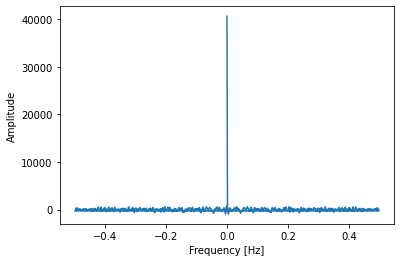

In [39]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
peaks, _ = find_peaks(fourier_transform, height=0)
plt.plot(fftfreq,fourier_transform)
#plt.plot(fourier_transform[peaks], "x")
# plt.plot(np.zeros_like(fourier_transform), "--", color="gray")
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/_peak_finding.py:264: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


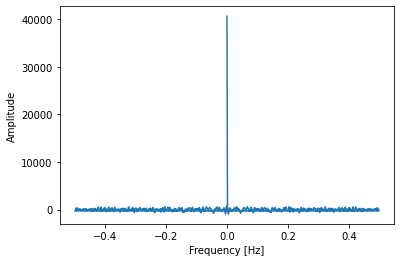

In [40]:
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
peaks, _ = find_peaks(fourier_transform, height=0)
plt.plot(fftfreq,fourier_transform)
# plt.plot(peaks, "x")
# plt.plot(np.zeros_like(fourier_transform), "--", color="gray")
plt.show()

In [41]:
df_fourier = pd.DataFrame({"Freq": fftfreq, "FFT": fourier_transform})

## Fill Missing Values

In [42]:
df_h["filled"], df_h["filled_tag"] = fill_missing_previous(df_h)

In [43]:
df_h[["Timestamp","Memoria Usata","filled", "filled_tag"]]

,Timestamp,Memoria Usata,filled,filled_tag
0,2022-02-01 00:00:00,66.974122,66.974122,current
1,2022-02-01 01:00:00,55.682537,55.682537,current
2,2022-02-01 02:00:00,68.725000,68.725000,current
3,2022-02-01 03:00:00,64.380769,64.380769,next
4,2022-02-01 04:00:00,73.976471,73.976471,current
...,...,...,...,...
667,2022-02-28 19:00:00,67.097551,67.097551,current
668,2022-02-28 20:00:00,61.370595,61.370595,current
669,2022-02-28 21:00:00,69.099310,69.099310,current
670,2022-02-28 22:00:00,73.652603,73.652603,current


In [44]:
df_h

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag
0,2022-02-01 00:00:00,2.872708e+06,697080.500000,795139.089552,0.000000,0.0,66.974122,1.155405,NaN,0.0,-2.0,66.974122,current
1,2022-02-01 01:00:00,2.872816e+06,747984.000000,987.687500,0.000000,0.0,55.682537,2.880597,NaN,1.0,-2.0,55.682537,current
2,2022-02-01 02:00:00,2.872854e+06,693604.000000,249.142857,0.000000,0.0,68.725000,0.000000,NaN,2.0,-2.0,68.725000,current
3,2022-02-01 03:00:00,NaN,NaN,NaN,NaN,NaN,64.380769,NaN,NaN,NaN,NaN,64.380769,next
4,2022-02-01 04:00:00,2.872866e+06,21808.000000,1840.000000,0.000000,0.0,73.976471,4.000000,NaN,4.0,-2.0,73.976471,current
...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2022-02-28 19:00:00,4.345205e+06,576137.866949,6540.200524,0.117797,0.0,67.097551,1.852542,410.370079,19.0,-2.0,67.097551,current
668,2022-02-28 20:00:00,4.346249e+06,583926.396476,30209.639198,0.029736,0.0,61.370595,1.441630,408.434426,20.0,-2.0,61.370595,current
669,2022-02-28 21:00:00,4.346928e+06,524553.545657,2043.323144,0.000000,0.0,69.099310,1.630290,411.712121,21.0,-2.0,69.099310,current
670,2022-02-28 22:00:00,4.347310e+06,503642.580952,2783.921986,0.000000,0.0,73.652603,1.568254,404.202703,22.0,-2.0,73.652603,current


In [45]:
import scipy.fft
scipy.fft(df_h["Memoria Usata"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Using scipy.fft as a function is deprecated and will be removed in SciPy 1.5.0, use scipy.fft.fft instead.
  


array([ 4.46418195e+04+0.00000000e+00j,  6.70970231e+02-8.84482924e+02j,
       -6.69732750e+02-5.08312866e+02j, -7.81486314e+02+1.46426374e+01j,
        5.28304254e+01-3.09214927e+02j,  3.96717227e+02-9.53212424e+01j,
        1.59503944e+02-4.31704707e+02j, -1.27535288e+02-6.32692474e+02j,
       -8.66175624e+01+4.14674688e+02j,  3.13641164e+01+5.34257554e+02j,
        5.04430053e+00+1.01960289e+02j, -2.62412349e+02-1.03110117e+02j,
       -4.48218458e+02+1.91393510e+02j,  1.89031025e+02+3.87327119e+02j,
        2.31127823e+02-4.97633288e+01j,  1.33381769e+02-1.28281274e+02j,
        4.19698479e+01+4.13347287e+02j, -5.17272361e+01+4.22476312e+02j,
        3.27856747e+02+9.36249776e+01j,  5.69241312e+02-4.32262213e+02j,
        9.93210426e+01-9.94550357e+01j,  3.20297367e+02-9.04569727e+01j,
       -2.78894468e+00+3.37488621e+02j,  7.64293412e+01+3.42546461e+02j,
        1.16778044e+02-9.30973908e+01j,  2.64385798e+02-4.80270967e+02j,
       -3.19704895e+02-2.57529194e+02j, -4.94132548

# Anomaly Detection with Interquartile Range

## Without Filling Values

In [46]:
# Calculate IQR for the 1st principal component (pc1)
q1_pc1, q3_pc1 = df_tmp['Memoria Usata'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
# Calculate upper and lower bounds for outlier for pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)

In [48]:
sorted(df_tmp['Memoria Usata'])

[28.290000000000003,
 29.770000000000003,
 29.876470588235293,
 30.69666666666667,
 34.62976190476191,
 35.09,
 36.11684210526316,
 36.56444444444444,
 37.25868421052631,
 37.85397260273973,
 38.55315789473684,
 40.875,
 41.26763157894737,
 42.8825,
 43.35,
 43.47,
 43.85928571428571,
 45.2475,
 45.80972222222223,
 46.17621621621622,
 46.332857142857144,
 46.54044117647059,
 46.574,
 46.59068181818182,
 46.748936170212765,
 47.1559375,
 47.356,
 47.93692982456141,
 47.989444444444445,
 48.455714285714286,
 48.46103448275862,
 48.53373626373626,
 48.71272727272728,
 49.243947368421054,
 49.592706766917296,
 49.931558441558444,
 50.08,
 50.257777777777775,
 50.42,
 50.854166666666664,
 51.00571428571429,
 51.00727272727273,
 51.433576043737574,
 51.474,
 51.59947368421052,
 51.63044444444444,
 51.7375,
 51.87178988326848,
 51.908852459016394,
 51.92172413793103,
 52.003735632183904,
 52.135285714285715,
 52.16133333333333,
 52.536654545454546,
 52.634272388059706,
 52.67137651821862,
 52

In [57]:
list(sorted(df_tmp['Memoria Usata'])).index(q1_pc1)

152

In [58]:
list(sorted(df_tmp['Memoria Usata'])).index(q3_pc1)

456

In [56]:
len(df_tmp)

609

Text(0.5, 1.0, 'Histogram of Memory Usage')

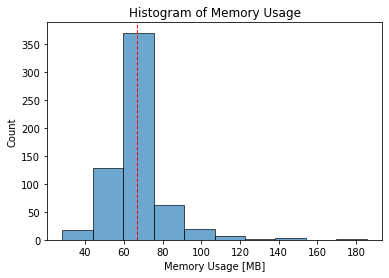

In [68]:




result = plt.hist(df_tmp['Memoria Usata'], edgecolor='k', alpha=0.65)

plt.axvline(df_tmp['Memoria Usata'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.xlabel("Memory Usage [MB]")
plt.ylabel("Count")
plt.title("Histogram of Memory Usage")

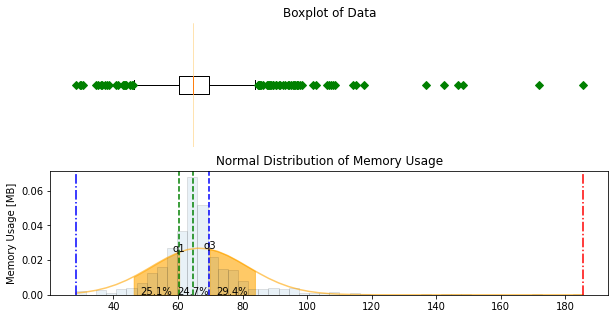

In [82]:
import numpy as np
import scipy
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
#from matplotlib.mlab import normpdf  #check this: https://github.com/materialsproject/pymatgen/issues/1657

def KDE_hist_plot(col):
      n_bins = 50

      fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,5))

      #histogram
      n, bins, patches = axes[1].hist(col, n_bins, density=True, alpha=.1, edgecolor='black' )
      #data = pd.Series(s)
      mu = col.mean()
      sigma = col.std()
      pdf = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2))
      median, q1, q3 = np.percentile(col, 50), np.percentile(col, 25), np.percentile(col, 75)

      #probability density function
      axes[1].plot(bins, pdf, color='orange', alpha=.6)

      #axes[1].figsize=(10,20)
      #fill from Q1-1.5*IQR to Q1 and Q3 to Q3+1.5*IQR
      iqr = 1.5 * (q3-q1)
      x1 = np.linspace(q1 - iqr, q1)
      x2 = np.linspace(q3, q3 + iqr)
      pdf1 = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x1-mu)**2/(2*sigma**2))
      pdf2 = 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x2-mu)**2/(2*sigma**2))
      axes[1].fill_between(x1, pdf1, 0, alpha=.6, color='orange')
      axes[1].fill_between(x2, pdf2, 0, alpha=.6, color='orange')

      #add text to bottom graph.
      axes[1].annotate("{:.1f}%".format(100*(norm(mu, sigma).cdf(q1)    -norm(mu, sigma).cdf(q1-iqr))), xy=(q1-iqr/2, 0), ha='center')
      axes[1].annotate("{:.1f}%".format(100*(norm(mu, sigma).cdf(q3)    -norm(mu, sigma).cdf(q1)    )), xy=(median  , 0), ha='center')
      axes[1].annotate("{:.1f}%".format(100*(norm(mu, sigma).cdf(q3+iqr)-norm(mu, sigma).cdf(q3)    )), xy=(q3+iqr/2, 0), ha='center')
      axes[1].annotate('q1', xy=(q1, norm(mu, sigma).pdf(q1)), ha='center')
      axes[1].annotate('q3', xy=(q3, norm(mu, sigma).pdf(q3)), ha='center')

      #dashed lines
      plt.axvline(col.quantile(0),color='b', linestyle='-.')
      plt.axvline(col.quantile(0.25),color='g', linestyle='--')
      plt.axvline(col.quantile(0.50),color='g', linestyle='--')
      plt.axvline(col.quantile(0.75),color='b', linestyle='--')
      plt.axvline(col.quantile(1),color='r', linestyle='-.')

      axes[1].set_ylabel('Probability Density')
      axes[1].set_ylabel('Memory Usage [MB]')
      axes[1].set_title("Normal Distribution of Memory Usage")

      #top boxplot
      axes[0].set_title('Boxplot of Data')
      axes[0].boxplot(col, 0, 'gD', vert=False)
      axes[0].axvline(median, color='orange', alpha=.6, linewidth=.5)
      axes[0].axis('off')

KDE_hist_plot(df_tmp["Memoria Usata"])

In [55]:
import statistics


statistics.median(list(df_tmp['Memoria Usata']))

64.74227058497367

In [54]:
q1_pc1, q3_pc1, 

(60.345711996336995, 69.7355421686747)

In [ ]:
df_tmp['anomaly'] = ((df_tmp['Memoria Usata']>upper_pc1)).astype('int')


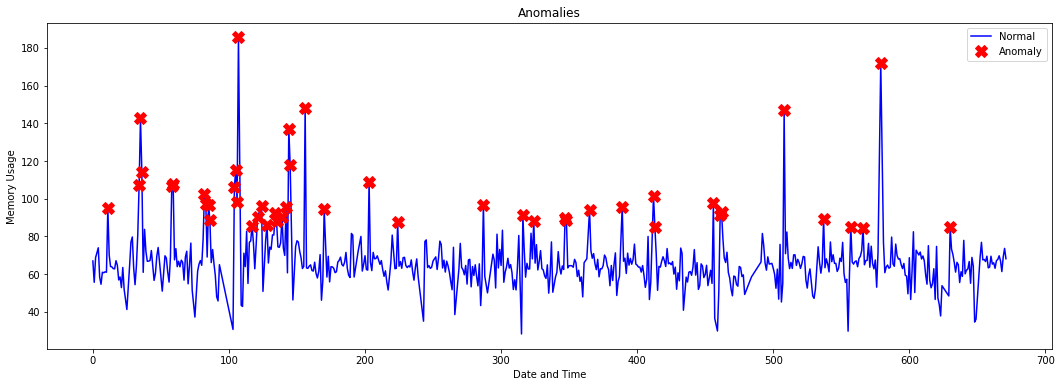

In [ ]:
a = df_tmp[df_tmp['anomaly'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_tmp['Memoria Usata'], color='blue', label='Normal')
_ = plt.plot(a['Memoria Usata'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Memory Usage')
_ = plt.title('Anomalies')
_ = plt.legend(loc='best')
plt.show();

## With Filling Values

In [ ]:
# Calculate IQR for the 1st principal component (pc1)
q1_pc1, q3_pc1 = df_h['Memoria Usata'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
# Calculate upper and lower bounds for outlier for pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)

In [ ]:
df_h['anomaly'] = ((df_h['Memoria Usata']>upper_pc1)).astype('int')


In [ ]:
df_h

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly
0,2022-02-01 00:00:00,2.872708e+06,697080.500000,795139.089552,0.000000,0.0,66.974122,1.155405,NaN,0.0,-2.0,66.974122,current,0
1,2022-02-01 01:00:00,2.872816e+06,747984.000000,987.687500,0.000000,0.0,55.682537,2.880597,NaN,1.0,-2.0,55.682537,current,0
2,2022-02-01 02:00:00,2.872854e+06,693604.000000,249.142857,0.000000,0.0,68.725000,0.000000,NaN,2.0,-2.0,68.725000,current,0
3,2022-02-01 03:00:00,NaN,NaN,NaN,NaN,NaN,64.380769,NaN,NaN,NaN,NaN,64.380769,next,0
4,2022-02-01 04:00:00,2.872866e+06,21808.000000,1840.000000,0.000000,0.0,73.976471,4.000000,NaN,4.0,-2.0,73.976471,current,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2022-02-28 19:00:00,4.345205e+06,576137.866949,6540.200524,0.117797,0.0,67.097551,1.852542,410.370079,19.0,-2.0,67.097551,current,0
668,2022-02-28 20:00:00,4.346249e+06,583926.396476,30209.639198,0.029736,0.0,61.370595,1.441630,408.434426,20.0,-2.0,61.370595,current,0
669,2022-02-28 21:00:00,4.346928e+06,524553.545657,2043.323144,0.000000,0.0,69.099310,1.630290,411.712121,21.0,-2.0,69.099310,current,0
670,2022-02-28 22:00:00,4.347310e+06,503642.580952,2783.921986,0.000000,0.0,73.652603,1.568254,404.202703,22.0,-2.0,73.652603,current,0


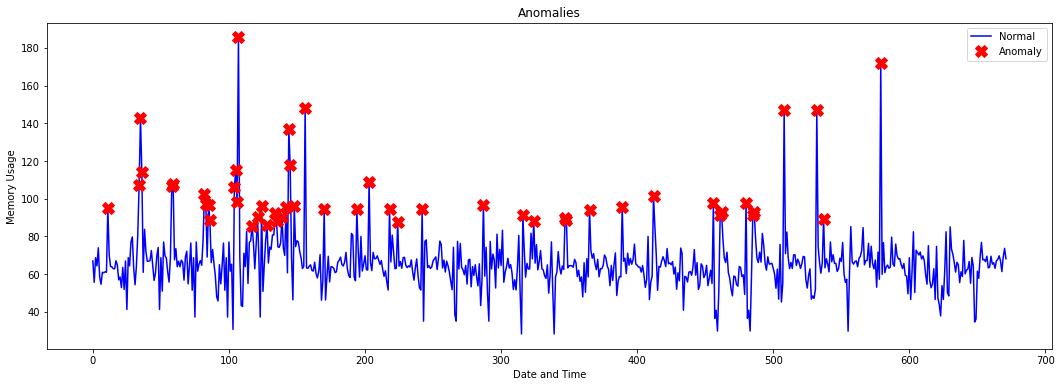

In [ ]:
a = df_h[df_h['anomaly'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_h['Memoria Usata'], color='blue', label='Normal')
_ = plt.plot(a['Memoria Usata'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Memory Usage')
_ = plt.title('Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [ ]:
df_h[df_h['anomaly']==1]

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly
11,2022-02-01 11:00:00,2.891562e+06,670249.105064,27195.757150,0.004727,0.0,95.093049,1.308980,NaN,11.0,-2.0,95.093049,current,1
34,2022-02-02 10:00:00,2.946951e+06,690959.248438,1414.805038,0.005825,0.0,107.244612,2.416512,NaN,10.0,-2.0,107.244612,current,1
35,2022-02-02 11:00:00,2.969238e+06,736318.859823,1892.485714,0.000855,0.0,142.530010,2.801589,NaN,11.0,-2.0,142.530010,current,1
36,2022-02-02 12:00:00,2.986588e+06,647169.168191,1248.559722,0.000000,0.0,114.091428,2.360772,NaN,12.0,-2.0,114.091428,current,1
58,2022-02-03 10:00:00,3.039322e+06,711478.035842,325125.894415,0.005303,0.0,106.667184,2.634615,NaN,10.0,-2.0,106.667184,current,1
59,2022-02-03 11:00:00,3.052746e+06,708010.602087,122049.842217,0.006244,0.0,107.973685,2.707163,NaN,11.0,-2.0,107.973685,current,1
82,2022-02-04 10:00:00,3.125225e+06,487178.646326,1334.281538,0.002612,0.0,102.624459,2.836444,NaN,10.0,-2.0,102.624459,current,1
83,2022-02-04 11:00:00,3.145903e+06,597542.368959,1416.234322,0.008037,0.0,97.168592,1.170650,NaN,11.0,-2.0,97.168592,current,1
85,2022-02-04 13:00:00,3.157660e+06,712079.641384,1841.915673,0.003387,0.0,96.904328,2.599705,NaN,13.0,-2.0,96.904328,current,1
86,2022-02-04 14:00:00,3.165405e+06,701076.182623,1967.062320,0.001839,0.0,88.569317,2.022066,NaN,14.0,-2.0,88.569317,current,1


In [ ]:
df_h.columns

Index(['Timestamp', 'Session ID', 'User ID', 'Elapsed Time', 'Proxied',
       'Compromesso', 'Memoria Usata', 'Qualita Rete', 'Status Errore', 'h',
       'memory_flag', 'filled', 'filled_tag', 'anomaly'],
      dtype='object')

In [ ]:
df_h[(df_h['anomaly']==1) & (df_h["filled_tag"]== "current")]["Memoria Usata"]

11      95.093049
34     107.244612
35     142.530010
36     114.091428
58     106.667184
59     107.973685
82     102.624459
83      97.168592
85      96.904328
86      88.569317
104    106.234359
105    115.099412
106     98.462353
107    185.467042
117     85.688875
121     90.321667
124     96.113636
128     86.180000
134     92.498804
135     88.031287
139     90.473673
142     95.671346
144    136.881739
145    117.680000
156    148.276524
170     94.293824
203    108.655753
224     87.605036
287     96.827895
316     91.200000
324     88.222115
347     89.523091
348     88.848640
365     94.067679
389     95.822019
412    101.668571
456     97.668000
461     91.609000
462     93.036167
508    146.792857
537     89.349145
579    171.866000
Name: Memoria Usata, dtype: float64

In [ ]:
set(df_tmp[(df_tmp['anomaly']==1)]["Memoria Usata"]) - set(df_h[(df_h['anomaly']==1) & (df_h["filled_tag"]== "current")]["Memoria Usata"])

{84.68762698253363, 85.0345, 85.18688888888889, 85.24986013986013}

In [ ]:
set(df_h[(df_h['anomaly']==1) & (df_h["filled_tag"]== "current")]["Memoria Usata"]) - set(df_tmp[(df_tmp['anomaly']==1)]["Memoria Usata"])

set()

# Anomaly Detection with K Means Algorithm

## Without Filling Values

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(np.array(df_tmp["Memoria Usata"]).reshape(-1, 1))
labels = kmeans.predict(np.array(df_tmp["Memoria Usata"]).reshape(-1, 1))


In [ ]:
df_tmp = df_tmp.reset_index()
df_tmp

,index,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,anomaly
0,0,2022-02-01 00:00:00,2.872708e+06,697080.500000,795139.089552,0.000000,0.0,66.974122,1.155405,NaN,0.0,-2.0,0
1,1,2022-02-01 01:00:00,2.872816e+06,747984.000000,987.687500,0.000000,0.0,55.682537,2.880597,NaN,1.0,-2.0,0
2,2,2022-02-01 02:00:00,2.872854e+06,693604.000000,249.142857,0.000000,0.0,68.725000,0.000000,NaN,2.0,-2.0,0
3,4,2022-02-01 04:00:00,2.872866e+06,21808.000000,1840.000000,0.000000,0.0,73.976471,4.000000,NaN,4.0,-2.0,0
4,5,2022-02-01 05:00:00,2.872952e+06,478532.275641,1589.505263,0.000000,0.0,58.430064,1.807692,NaN,5.0,-2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,667,2022-02-28 19:00:00,4.345205e+06,576137.866949,6540.200524,0.117797,0.0,67.097551,1.852542,410.370079,19.0,-2.0,0
605,668,2022-02-28 20:00:00,4.346249e+06,583926.396476,30209.639198,0.029736,0.0,61.370595,1.441630,408.434426,20.0,-2.0,0
606,669,2022-02-28 21:00:00,4.346928e+06,524553.545657,2043.323144,0.000000,0.0,69.099310,1.630290,411.712121,21.0,-2.0,0
607,670,2022-02-28 22:00:00,4.347310e+06,503642.580952,2783.921986,0.000000,0.0,73.652603,1.568254,404.202703,22.0,-2.0,0


In [ ]:
unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))
# Write a function that calculates distance between each point and the centroid of the closest cluster
def getDistanceByPoint(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster, 
            returns the distances in pandas series"""
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)
# Assume that 13% of the entire data set are anomalies 
outliers_fraction = 0.13
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(df_tmp["Memoria Usata"], kmeans)
# number of observations that equate to the 13% of the entire data set
number_of_outliers = int(outliers_fraction*len(distance))
# Take the minimum of the largest 13% of the distances as the threshold
threshold = distance.nlargest(number_of_outliers).min()

# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
df_tmp['anomaly_k'] = (distance >= threshold).astype(int) 
mean_val_h = np.mean(df_tmp["Memoria Usata"])
for i in range(len(df_tmp)):
  if df_tmp.iloc[i]["Memoria Usata"] <= mean_val_h:
    df_tmp['anomaly_k'].iloc[i] = 0

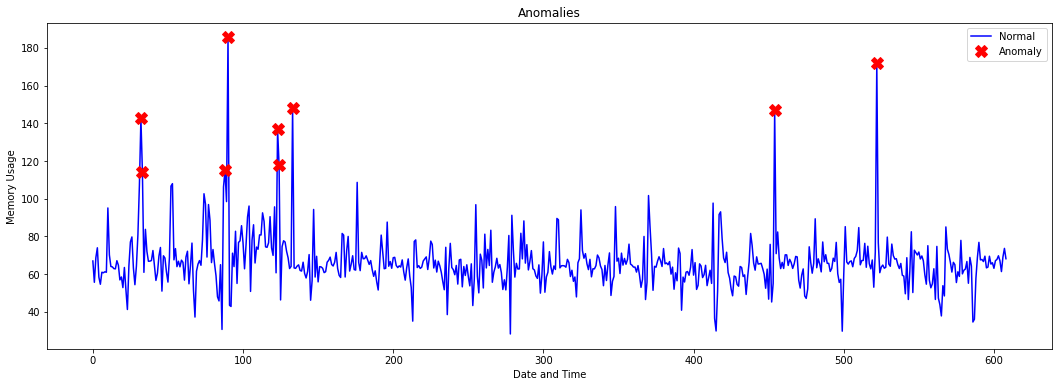

In [ ]:
a = df_tmp[df_tmp['anomaly_k'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_tmp['Memoria Usata'], color='blue', label='Normal')
_ = plt.plot(a['Memoria Usata'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Memory Usage')
_ = plt.title('Anomalies')
_ = plt.legend(loc='best')
plt.show();

## With Filling Values

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(np.array(df_h["Memoria Usata"]).reshape(-1, 1))
labels = kmeans.predict(np.array(df_h["Memoria Usata"]).reshape(-1, 1))


In [ ]:
unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))
# Write a function that calculates distance between each point and the centroid of the closest cluster
def getDistanceByPoint(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster, 
            returns the distances in pandas series"""
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)
# Assume that 13% of the entire data set are anomalies 
outliers_fraction = 0.13
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(df_h["Memoria Usata"], kmeans)
# number of observations that equate to the 13% of the entire data set
number_of_outliers = int(outliers_fraction*len(distance))
# Take the minimum of the largest 13% of the distances as the threshold
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
df_h['anomaly_k'] = (distance >= threshold).astype(int) 
mean_val_h = np.mean(df_h["Memoria Usata"])
for i in range(len(df_h)):
  if df_h.iloc[i]["Memoria Usata"] <= mean_val_h:
    df_h['anomaly_k'].iloc[i] = 0


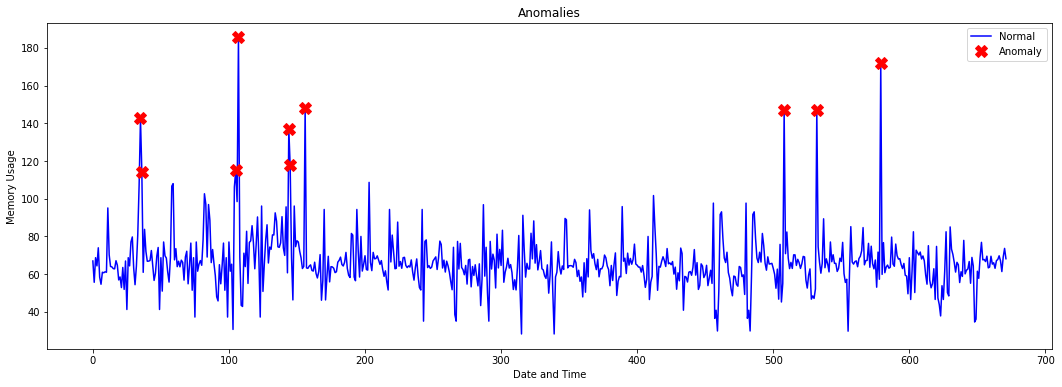

In [ ]:
a = df_h[df_h['anomaly_k'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_h['Memoria Usata'], color='blue', label='Normal')
_ = plt.plot(a['Memoria Usata'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Memory Usage')
_ = plt.title('Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [ ]:
set(df_h[(df_h['anomaly_k']==1) & (df_h["filled_tag"]== "current")]["Memoria Usata"]) - set(df_tmp[(df_tmp['anomaly_k']==1)]["Memoria Usata"])

set()

In [ ]:
set(df_tmp[(df_tmp['anomaly_k']==1)]["Memoria Usata"]) - set(df_h[(df_h['anomaly_k']==1) & (df_h["filled_tag"]== "current")]["Memoria Usata"]) 

set()

# Anomaly Detection with Isolation Forest

## Without Filling Values

In [ ]:
outliers_fraction = 0.13
model = IsolationForest(contamination=outliers_fraction)
model.fit(np.array(df_tmp["Memoria Usata"]).reshape(-1, 1)) 

IsolationForest(contamination=0.13)

In [ ]:
df_tmp['anomaly_f'] = pd.Series(model.predict(np.array(df_tmp["Memoria Usata"]).reshape(-1, 1)))
for i in range(len(df_tmp)):
  if df_tmp.iloc[i]["Memoria Usata"] <= mean_val_h:
    df_tmp['anomaly_f'].iloc[i] = 1

df_tmp.anomaly_f[df_tmp['anomaly_f'] == 1] = 0
df_tmp.anomaly_f[df_tmp['anomaly_f'] == -1] = 1

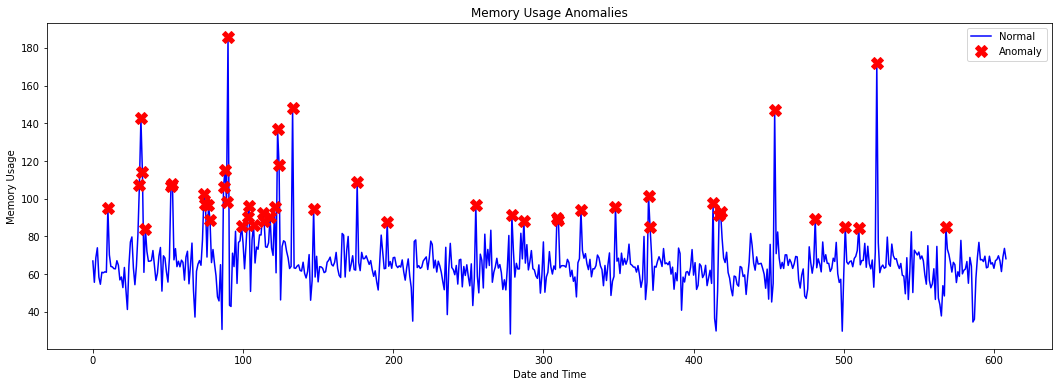

In [ ]:
# visualization
df_tmp['anomaly_f'] = pd.Series(df_tmp['anomaly_f'].values, index=df_tmp.index)
a = df_tmp.loc[df_tmp['anomaly_f'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_tmp['Memoria Usata'], color='blue', label='Normal')
_ = plt.plot(a['Memoria Usata'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Memory Usage')
_ = plt.title('Memory Usage Anomalies')
_ = plt.legend(loc='best')
plt.show();

## With Filling Values

In [ ]:
 
outliers_fraction = 0.13
model =  IsolationForest(contamination=outliers_fraction)
model.fit(np.array(df_h["Memoria Usata"]).reshape(-1, 1)) 

IsolationForest(contamination=0.13)

In [ ]:
df_h['anomaly_f'] = pd.Series(model.predict(np.array(df_h["Memoria Usata"]).reshape(-1, 1)))
for i in range(len(df_h)):
  if df_h.iloc[i]["Memoria Usata"] <= mean_val_h:
    df_h['anomaly_f'].iloc[i] = 1

df_h.anomaly_f[df_h['anomaly_f'] == 1] = 0
df_h.anomaly_f[df_h['anomaly_f'] == -1] = 1

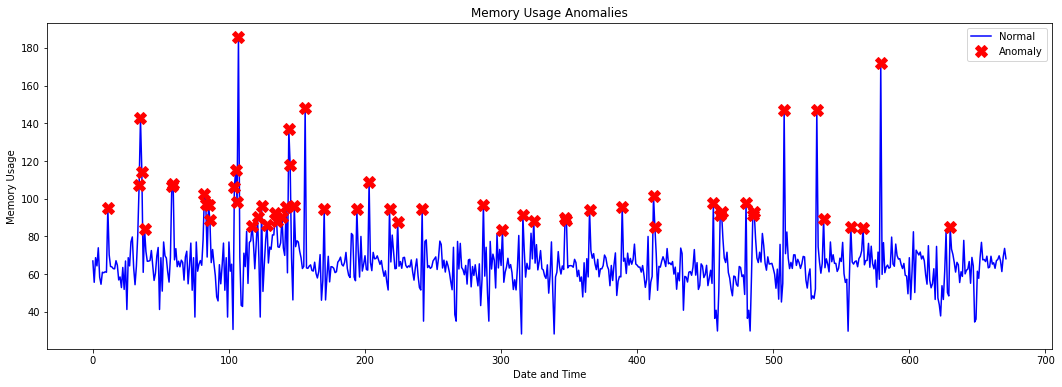

In [ ]:
# visualization
df_h['anomaly_f'] = pd.Series(df_h['anomaly_f'].values, index=df_h.index)
a = df_h.loc[df_h['anomaly_f'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df_h['Memoria Usata'], color='blue', label='Normal')
_ = plt.plot(a['Memoria Usata'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Memory Usage')
_ = plt.title('Memory Usage Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [ ]:
set(df_h[(df_h['anomaly_f']==1) & (df_h["filled_tag"]== "current")]["Memoria Usata"]) - set(df_tmp[(df_tmp['anomaly_f']==1)]["Memoria Usata"])

{83.28356382978723}

In [ ]:
set(df_tmp[(df_tmp['anomaly_f']==1)]["Memoria Usata"]) - set(df_h[(df_h['anomaly_f']==1) & (df_h["filled_tag"]== "current")]["Memoria Usata"]) 

set()

# Analysis

In [ ]:
anomaly_methods = ["Interquartile Range","K-Means", "Isolation Forest"]
anomaly_cols = ["anomaly", "anomaly_k", "anomaly_f"]
for i in range(len(anomaly_methods)):
  print("With {} Algoratihm, {} anomalies detected. It's {} of the total data.".format(anomaly_methods[i],df_h[anomaly_cols[i]].value_counts()[1], df_h[anomaly_cols[i]].value_counts()[1]/len(df_h)))

With Interquartile Range Algoratihm, 50 anomalies detected. It's 0.0744047619047619 of the total data.
With K-Means Algoratihm, 10 anomalies detected. It's 0.01488095238095238 of the total data.
With Isolation Forest Algoratihm, 56 anomalies detected. It's 0.08333333333333333 of the total data.


## Anomalies Detected by all three algorithm

In [ ]:
df_h.loc[(df_h["anomaly"]==1) & (df_h["anomaly_k"]==1) & (df_h["anomaly_f"]==1)]

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly,anomaly_k,anomaly_f
35,2022-02-02 11:00:00,2.969238e+06,736318.859823,1892.485714,0.000855,0.0,142.530010,2.801589,NaN,11.0,-2.0,142.530010,current,1,1,1
36,2022-02-02 12:00:00,2.986588e+06,647169.168191,1248.559722,0.000000,0.0,114.091428,2.360772,NaN,12.0,-2.0,114.091428,current,1,1,1
105,2022-02-05 09:00:00,3.189112e+06,230661.441176,1807.354839,0.000000,0.0,115.099412,0.117647,500.000000,9.0,-2.0,115.099412,current,1,1,1
107,2022-02-05 11:00:00,3.189215e+06,5633.000000,926.492308,0.000000,0.0,185.467042,0.000000,404.000000,11.0,-2.0,185.467042,current,1,1,1
144,2022-02-07 00:00:00,3.192633e+06,242678.608696,8694.923077,0.000000,0.0,136.881739,3.304348,467.666667,0.0,-2.0,136.881739,current,1,1,1
145,2022-02-07 01:00:00,3.192650e+06,321032.000000,3232.000000,0.000000,0.0,117.680000,2.916667,NaN,1.0,-2.0,117.680000,current,1,1,1
156,2022-02-07 12:00:00,3.220046e+06,647042.813648,3359.938873,0.003281,0.0,148.276524,1.984580,408.780899,12.0,-2.0,148.276524,current,1,1,1
508,2022-02-22 04:00:00,3.953494e+06,304206.000000,360.384615,0.000000,0.0,146.792857,2.000000,NaN,4.0,-2.0,146.792857,current,1,1,1
532,2022-02-23 04:00:00,NaN,NaN,NaN,NaN,NaN,146.792857,NaN,NaN,NaN,NaN,146.792857,previous,1,1,1
579,2022-02-25 03:00:00,4.193272e+06,319986.950000,2514.500000,0.000000,0.0,171.866000,2.100000,NaN,3.0,-2.0,171.866000,current,1,1,1


In [ ]:
len(df_h.loc[(df_h["anomaly"]==1) & (df_h["anomaly_k"]==1) & (df_h["anomaly_f"]==1)])

10

In [ ]:
min(df_h.loc[(df_h["anomaly"]==1) & (df_h["anomaly_k"]==1) & (df_h["anomaly_f"]==1)]["Memoria Usata"]), max(df_h.loc[(df_h["anomaly"]==1) & (df_h["anomaly_k"]==1) & (df_h["anomaly_f"]==1)]["Memoria Usata"])

(114.09142784552846, 185.46704225352113)

## Anomalies Detected by Interquartile Range and K means

In [ ]:
df_h.loc[(df_h["anomaly"]==1) & (df_h["anomaly_k"]==1) & (df_h["anomaly_f"]==0)]


,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly,anomaly_k,anomaly_f


## Anomalies Detected by Interquartile Range and Isolation Forest

In [ ]:
df_h.loc[(df_h["anomaly"]==1) & (df_h["anomaly_k"]==0) & (df_h["anomaly_f"]==1)]

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly,anomaly_k,anomaly_f
11,2022-02-01 11:00:00,2.891562e+06,670249.105064,27195.757150,0.004727,0.0,95.093049,1.308980,NaN,11.0,-2.0,95.093049,current,1,0,1
34,2022-02-02 10:00:00,2.946951e+06,690959.248438,1414.805038,0.005825,0.0,107.244612,2.416512,NaN,10.0,-2.0,107.244612,current,1,0,1
58,2022-02-03 10:00:00,3.039322e+06,711478.035842,325125.894415,0.005303,0.0,106.667184,2.634615,NaN,10.0,-2.0,106.667184,current,1,0,1
59,2022-02-03 11:00:00,3.052746e+06,708010.602087,122049.842217,0.006244,0.0,107.973685,2.707163,NaN,11.0,-2.0,107.973685,current,1,0,1
82,2022-02-04 10:00:00,3.125225e+06,487178.646326,1334.281538,0.002612,0.0,102.624459,2.836444,NaN,10.0,-2.0,102.624459,current,1,0,1
83,2022-02-04 11:00:00,3.145903e+06,597542.368959,1416.234322,0.008037,0.0,97.168592,1.170650,NaN,11.0,-2.0,97.168592,current,1,0,1
85,2022-02-04 13:00:00,3.157660e+06,712079.641384,1841.915673,0.003387,0.0,96.904328,2.599705,NaN,13.0,-2.0,96.904328,current,1,0,1
86,2022-02-04 14:00:00,3.165405e+06,701076.182623,1967.062320,0.001839,0.0,88.569317,2.022066,NaN,14.0,-2.0,88.569317,current,1,0,1
104,2022-02-05 08:00:00,3.189038e+06,33928.423077,8258.949153,0.000000,0.0,106.234359,1.756410,500.000000,8.0,-2.0,106.234359,current,1,0,1
106,2022-02-05 10:00:00,3.189162e+06,202122.588235,4075.705882,0.000000,0.0,98.462353,0.647059,400.000000,10.0,-2.0,98.462353,current,1,0,1


In [ ]:
len(df_h.loc[(df_h["anomaly"]==1) & (df_h["anomaly_k"]==0) & (df_h["anomaly_f"]==1)])

40

In [ ]:
min(df_h.loc[(df_h["anomaly"]==1) & (df_h["anomaly_k"]==0) & (df_h["anomaly_f"]==1)]["Memoria Usata"]), max(df_h.loc[(df_h["anomaly"]==1) & (df_h["anomaly_k"]==0) & (df_h["anomaly_f"]==1)]["Memoria Usata"])

(85.688875, 108.65575333906116)

## Anomalies Detected by only Interquartile Range

In [ ]:
df_h.loc[(df_h["anomaly"]==1) & (df_h["anomaly_k"]==0) & (df_h["anomaly_f"]==0)]

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly,anomaly_k,anomaly_f


In [ ]:
len(df_h.loc[(df_h["anomaly"]==1) & (df_h["anomaly_k"]==0) & (df_h["anomaly_f"]==0)])

0

## Anomalies Detected by K Means and Isolation Forest

In [ ]:
df_h.loc[(df_h["anomaly"]==0) & (df_h["anomaly_k"]==1) & (df_h["anomaly_f"]==1)]

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly,anomaly_k,anomaly_f


## Anomalies Detected by only K Means

In [ ]:
df_h.loc[(df_h["anomaly"]==0) & (df_h["anomaly_k"]==1) & (df_h["anomaly_f"]==0)]

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly,anomaly_k,anomaly_f


## Anomalies Detected by only Isolation Forest

In [ ]:
df_h.loc[(df_h["anomaly"]==0) & (df_h["anomaly_k"]==0) & (df_h["anomaly_f"]==1)]

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly,anomaly_k,anomaly_f
38,2022-02-02 14:00:00,2.993440e+06,693964.039354,1712.618003,0.000850,0.0,83.755059,2.408964,NaN,14.0,-2.0,83.755059,current,0,0,1
301,2022-02-13 13:00:00,3.542642e+06,484656.063830,498.775000,0.000000,0.0,83.283564,2.446809,408.095238,13.0,-2.0,83.283564,current,0,0,1
413,2022-02-18 05:00:00,3.829263e+06,501038.699301,3146.259615,0.000000,0.0,85.249860,2.874126,451.500000,5.0,-2.0,85.249860,current,0,0,1
557,2022-02-24 05:00:00,4.113089e+06,392654.711111,1271.028571,0.000000,0.0,85.186889,2.370370,451.500000,5.0,-2.0,85.186889,current,0,0,1
566,2022-02-24 14:00:00,4.154781e+06,635627.877434,1285.241912,0.032222,0.0,84.687627,2.388376,415.006424,14.0,-2.0,84.687627,current,0,0,1
630,2022-02-27 06:00:00,4.270744e+06,393232.616667,327.272727,0.000000,0.0,85.034500,1.233333,NaN,6.0,-2.0,85.034500,current,0,0,1


In [ ]:
len(df_h.loc[(df_h["anomaly"]==0) & (df_h["anomaly_k"]==0) & (df_h["anomaly_f"]==1)])

6

In [ ]:
min(df_h.loc[(df_h["anomaly"]==0) & (df_h["anomaly_k"]==0) & (df_h["anomaly_f"]==1)]["Memoria Usata"]), max(df_h.loc[(df_h["anomaly"]==0) & (df_h["anomaly_k"]==0) & (df_h["anomaly_f"]==1)]["Memoria Usata"])

(83.28356382978723, 85.24986013986013)

## Summary

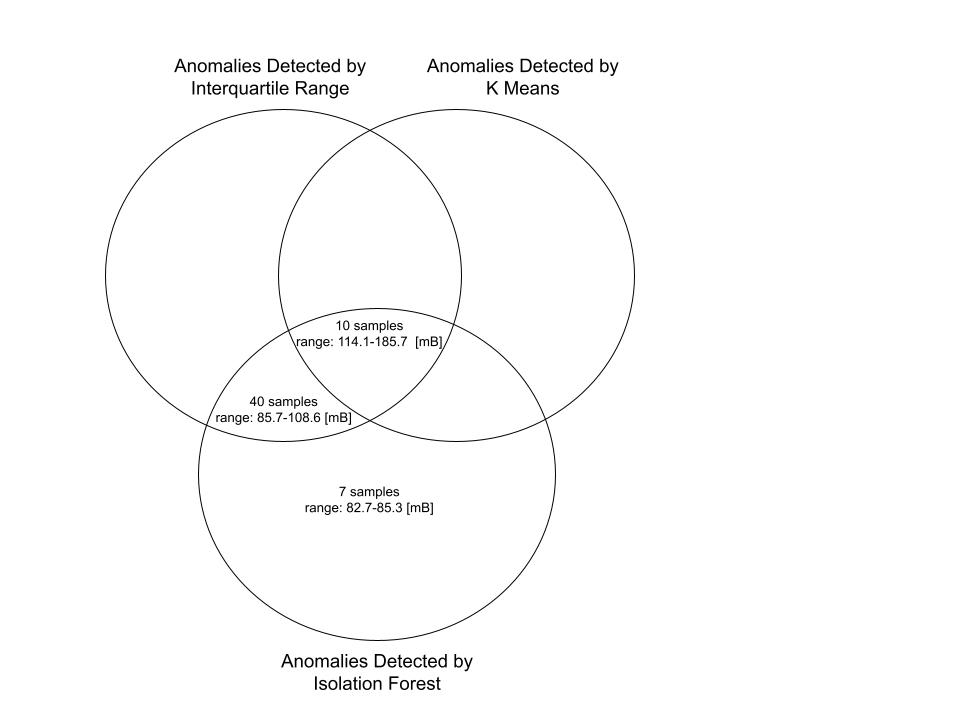




# Analysis with New Data (Next Month, March 2022)

In [ ]:
path03="/content/gdrive/My Drive/Thesis-Project/data/formatted_whole03.csv"
df03 = pd.read_csv(path03)
df03

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Unnamed: 0.1,Session ID,User ID,Event Name,Elapsed Time,Nome Componente,Inizio Caricamento,Fine Caricamento,Descrizione Evento,...,Errore,Path Errore,Custom Field Errore,Status Errore,Messaggio Errore,Exception,date,h,day_name,memory_flag
0,2554,2554,4576773,108747,exception,NaN,NaN,NaN,NaN,ConsoleLogError,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-04,0,Friday,-2
1,2557,2557,4576774,108747,exception,NaN,NaN,NaN,NaN,ConsoleLogError,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-04,0,Friday,-2
2,2555,2555,4576775,108747,exception,NaN,NaN,NaN,NaN,ClientListError,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-04,0,Friday,-2
3,2558,2558,4576776,108747,Client Detail,2499.0,Customer History,2022-03-04 00:00:07 +0000,2022-03-04 00:00:09 +0000,Customer History,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-04,0,Friday,-2
4,2556,2556,4576777,108747,exception,NaN,NaN,NaN,NaN,ConsoleLogError,...,NaN,NaN,RequestServiceProvider-post,NaN,Http failure response for (unknown url): 0 Unk...,NaN,2022-03-04,0,Friday,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149175,146665,146665,5276116,593619,Home,4637.0,Load HomePage KPI from service,2022-03-20 23:57:01 +0000,2022-03-20 23:57:06 +0000,Load HomePage KPI from service,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-20,23,Sunday,-2
149176,146664,146664,5276117,593619,593619,NaN,NaN,NaN,NaN,Set User ID,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-20,23,Sunday,-2
149177,146663,146663,5276118,593619,Home,1685.0,Load Agenda from service,2022-03-20 23:57:18 +0000,2022-03-20 23:57:20 +0000,Load Agenda from service,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-20,23,Sunday,-2
149178,146662,146662,5276119,593619,Contacts,3544.0,Load contacts from service,2022-03-20 23:57:20 +0000,2022-03-20 23:57:24 +0000,Load contacts from service,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-20,23,Sunday,-2


In [ ]:
#Formatting DF
#Convert dataframe "Timestamp" column from string to datetime type of object, therefore we can simplify problem as a timeseries prediction, 
#also timestamp is a unique value in our table that we can analyze data based on it

#df['Timestamp'] = [parser.parse(df["Timestamp"].iloc[i]) for i in range(len(df)) ]
df03['Timestamp'] = pd.to_datetime(df03['Timestamp'])
df03 = df03.sort_values(by='Timestamp') #Can be changed to Session ID

df03 = df03.drop('Unnamed: 0',axis=1)
df03 = df03.reset_index(drop=True)
df03 = df03.drop('Unnamed: 0.1',axis=1)
df03 = df03.reset_index(drop=True)

In [ ]:
df03

,Session ID,User ID,Event Name,Elapsed Time,Nome Componente,Inizio Caricamento,Fine Caricamento,Descrizione Evento,Stack Trace,Tipo Evento,...,Errore,Path Errore,Custom Field Errore,Status Errore,Messaggio Errore,Exception,date,h,day_name,memory_flag
0,4576773,108747,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,genericEvent,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-04,0,Friday,-2
1,4576774,108747,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,genericEvent,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-04,0,Friday,-2
2,4576775,108747,exception,NaN,NaN,NaN,NaN,ClientListError,NaN,genericEvent,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-04,0,Friday,-2
3,4576776,108747,Client Detail,2499.0,Customer History,2022-03-04 00:00:07 +0000,2022-03-04 00:00:09 +0000,Customer History,NaN,pageLoadTime,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-04,0,Friday,-2
4,4576777,108747,exception,NaN,NaN,NaN,NaN,ConsoleLogError,NaN,genericEvent,...,NaN,NaN,RequestServiceProvider-post,NaN,Http failure response for (unknown url): 0 Unk...,NaN,2022-03-04,0,Friday,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149175,5276116,593619,Home,4637.0,Load HomePage KPI from service,2022-03-20 23:57:01 +0000,2022-03-20 23:57:06 +0000,Load HomePage KPI from service,NaN,pageLoadTime,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-20,23,Sunday,-2
149176,5276117,593619,593619,NaN,NaN,NaN,NaN,Set User ID,NaN,loginSuccess,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-20,23,Sunday,-2
149177,5276118,593619,Home,1685.0,Load Agenda from service,2022-03-20 23:57:18 +0000,2022-03-20 23:57:20 +0000,Load Agenda from service,NaN,pageLoadTime,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-20,23,Sunday,-2
149178,5276119,593619,Contacts,3544.0,Load contacts from service,2022-03-20 23:57:20 +0000,2022-03-20 23:57:24 +0000,Load contacts from service,NaN,pageLoadTime,...,NaN,NaN,NaN,NaN,NaN,NaN,2022-03-20,23,Sunday,-2


In [ ]:
df03_h = df03.set_index('Timestamp').resample('60min').mean()
df03_h = df03_h.reset_index()

In [ ]:
df03_h

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag
0,2022-03-04 00:00:00,4.576196e+06,431306.439252,9.569286e+02,0.0,0.0,34.785888,1.018692,403.00,0.0,-2.0
1,2022-03-04 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-03-04 02:00:00,4.570373e+06,535144.000000,3.400000e+01,0.0,0.0,33.990000,0.000000,NaN,2.0,-2.0
3,2022-03-04 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-04 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
403,2022-03-20 19:00:00,5.275541e+06,525102.936416,1.541954e+06,0.0,0.0,58.819653,2.271676,480.60,19.0,-2.0
404,2022-03-20 20:00:00,5.275726e+06,542100.275510,1.106203e+03,0.0,0.0,61.570867,1.969388,434.50,20.0,-2.0
405,2022-03-20 21:00:00,5.275864e+06,656193.048780,3.468293e+03,0.0,0.0,54.348780,1.048780,421.80,21.0,-2.0
406,2022-03-20 22:00:00,5.275978e+06,550085.691781,1.319500e+03,0.0,0.0,55.273219,1.931507,427.25,22.0,-2.0


In [ ]:
df03_h["filled"], df03_h["filled_tag"] = fill_missing_previous(df03_h)

In [ ]:
df03_h[["Timestamp","Memoria Usata","filled", "filled_tag"]]

,Timestamp,Memoria Usata,filled,filled_tag
0,2022-03-04 00:00:00,34.785888,34.785888,current
1,2022-03-04 01:00:00,85.859302,85.859302,next
2,2022-03-04 02:00:00,33.990000,33.990000,current
3,2022-03-04 03:00:00,34.063333,34.063333,next
4,2022-03-04 04:00:00,62.968421,62.968421,next
...,...,...,...,...
403,2022-03-20 19:00:00,58.819653,58.819653,current
404,2022-03-20 20:00:00,61.570867,61.570867,current
405,2022-03-20 21:00:00,54.348780,54.348780,current
406,2022-03-20 22:00:00,55.273219,55.273219,current


In [ ]:
df03_h

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag
0,2022-03-04 00:00:00,4.576196e+06,431306.439252,9.569286e+02,0.0,0.0,34.785888,1.018692,403.00,0.0,-2.0,34.785888,current
1,2022-03-04 01:00:00,NaN,NaN,NaN,NaN,NaN,85.859302,NaN,NaN,NaN,NaN,85.859302,next
2,2022-03-04 02:00:00,4.570373e+06,535144.000000,3.400000e+01,0.0,0.0,33.990000,0.000000,NaN,2.0,-2.0,33.990000,current
3,2022-03-04 03:00:00,NaN,NaN,NaN,NaN,NaN,34.063333,NaN,NaN,NaN,NaN,34.063333,next
4,2022-03-04 04:00:00,NaN,NaN,NaN,NaN,NaN,62.968421,NaN,NaN,NaN,NaN,62.968421,next
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2022-03-20 19:00:00,5.275541e+06,525102.936416,1.541954e+06,0.0,0.0,58.819653,2.271676,480.60,19.0,-2.0,58.819653,current
404,2022-03-20 20:00:00,5.275726e+06,542100.275510,1.106203e+03,0.0,0.0,61.570867,1.969388,434.50,20.0,-2.0,61.570867,current
405,2022-03-20 21:00:00,5.275864e+06,656193.048780,3.468293e+03,0.0,0.0,54.348780,1.048780,421.80,21.0,-2.0,54.348780,current
406,2022-03-20 22:00:00,5.275978e+06,550085.691781,1.319500e+03,0.0,0.0,55.273219,1.931507,427.25,22.0,-2.0,55.273219,current


## Anomaly Detection with Interquartile Range

In [ ]:
# Calculate IQR for the 1st principal component (pc1)
q1_pc1, q3_pc1 = df03_h['Memoria Usata'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
# Calculate upper and lower bounds for outlier for pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)

In [ ]:
df03_h['anomaly'] = ((df03_h['Memoria Usata']>upper_pc1)).astype('int')


In [ ]:
df03_h

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly
0,2022-03-04 00:00:00,4.576196e+06,431306.439252,9.569286e+02,0.0,0.0,34.785888,1.018692,403.00,0.0,-2.0,34.785888,current,0
1,2022-03-04 01:00:00,NaN,NaN,NaN,NaN,NaN,85.859302,NaN,NaN,NaN,NaN,85.859302,next,0
2,2022-03-04 02:00:00,4.570373e+06,535144.000000,3.400000e+01,0.0,0.0,33.990000,0.000000,NaN,2.0,-2.0,33.990000,current,0
3,2022-03-04 03:00:00,NaN,NaN,NaN,NaN,NaN,34.063333,NaN,NaN,NaN,NaN,34.063333,next,0
4,2022-03-04 04:00:00,NaN,NaN,NaN,NaN,NaN,62.968421,NaN,NaN,NaN,NaN,62.968421,next,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2022-03-20 19:00:00,5.275541e+06,525102.936416,1.541954e+06,0.0,0.0,58.819653,2.271676,480.60,19.0,-2.0,58.819653,current,0
404,2022-03-20 20:00:00,5.275726e+06,542100.275510,1.106203e+03,0.0,0.0,61.570867,1.969388,434.50,20.0,-2.0,61.570867,current,0
405,2022-03-20 21:00:00,5.275864e+06,656193.048780,3.468293e+03,0.0,0.0,54.348780,1.048780,421.80,21.0,-2.0,54.348780,current,0
406,2022-03-20 22:00:00,5.275978e+06,550085.691781,1.319500e+03,0.0,0.0,55.273219,1.931507,427.25,22.0,-2.0,55.273219,current,0


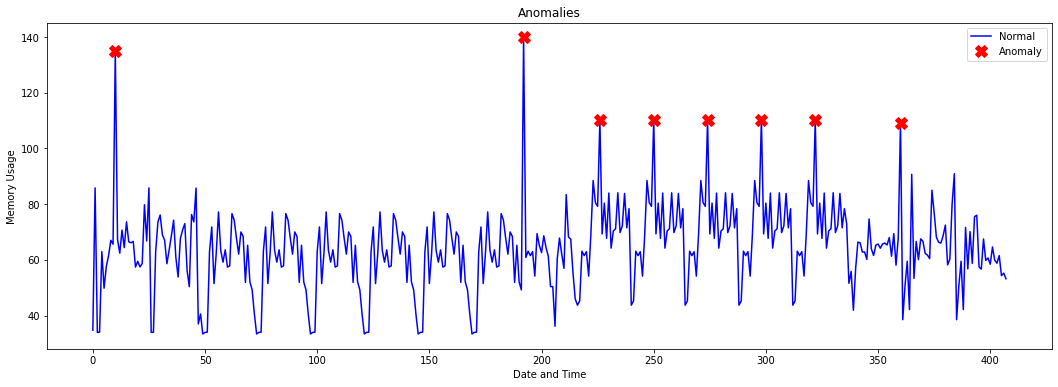

In [ ]:
a = df03_h[df03_h['anomaly'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df03_h['Memoria Usata'], color='blue', label='Normal')
_ = plt.plot(a['Memoria Usata'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Memory Usage')
_ = plt.title('Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [ ]:
df03_h[df03_h['anomaly']==1]

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly
10,2022-03-04 10:00:00,4601515.0,698995.696461,34408.660174,0.010065,0.0,134.952514,2.451288,410.363171,10.0,-2.0,134.952514,current,1
192,2022-03-12 00:00:00,5026367.5,443834.285714,2300.166667,0.000000,0.0,139.855000,1.285714,NaN,0.0,-2.0,139.855000,current,1
226,2022-03-13 10:00:00,5031223.5,409234.360465,3096.117647,0.000000,0.0,110.243663,2.843023,422.047619,10.0,-2.0,110.243663,current,1
250,2022-03-14 10:00:00,NaN,NaN,NaN,NaN,NaN,110.243663,NaN,NaN,NaN,NaN,110.243663,previous,1
274,2022-03-15 10:00:00,NaN,NaN,NaN,NaN,NaN,110.243663,NaN,NaN,NaN,NaN,110.243663,previous,1
298,2022-03-16 10:00:00,NaN,NaN,NaN,NaN,NaN,110.243663,NaN,NaN,NaN,NaN,110.243663,previous,1
322,2022-03-17 10:00:00,NaN,NaN,NaN,NaN,NaN,110.243663,NaN,NaN,NaN,NaN,110.243663,previous,1
360,2022-03-19 00:00:00,5269773.0,568564.000000,1537.333333,0.000000,0.0,109.223846,2.000000,NaN,0.0,-2.0,109.223846,current,1


## Anomaly Detection with K Means Algorithm

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(np.array(df03_h["Memoria Usata"]).reshape(-1, 1))
labels = kmeans.predict(np.array(df03_h["Memoria Usata"]).reshape(-1, 1))


In [ ]:
unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))
# Write a function that calculates distance between each point and the centroid of the closest cluster
def getDistanceByPoint(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster, 
            returns the distances in pandas series"""
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)
# Assume that 13% of the entire data set are anomalies 
outliers_fraction = 0.13
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(df03_h["Memoria Usata"], kmeans)
# number of observations that equate to the 13% of the entire data set
number_of_outliers = int(outliers_fraction*len(distance))
# Take the minimum of the largest 13% of the distances as the threshold
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
df03_h['anomaly_k'] = (distance >= threshold).astype(int) 
mean_val_h = np.mean(df03_h["Memoria Usata"])
for i in range(len(df03_h)):
  if df03_h.iloc[i]["Memoria Usata"] <= mean_val_h:
    df03_h['anomaly_k'].iloc[i] = 0


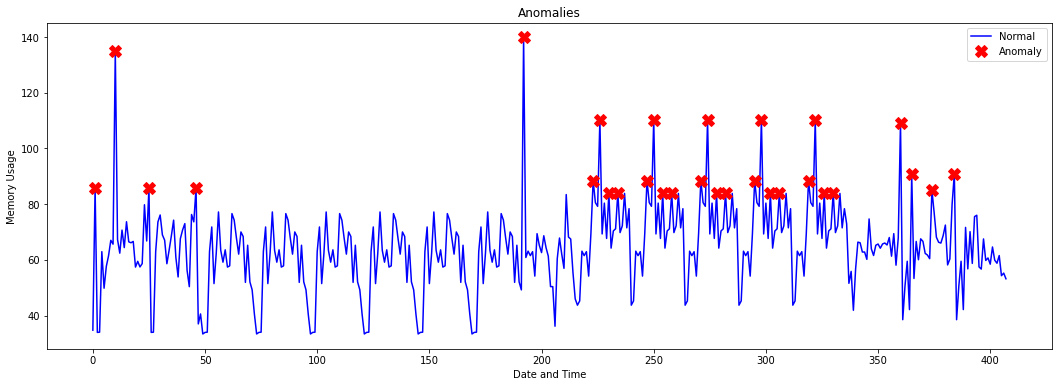

In [ ]:
a = df03_h[df03_h['anomaly_k'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df03_h['Memoria Usata'], color='blue', label='Normal')
_ = plt.plot(a['Memoria Usata'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Memory Usage')
_ = plt.title('Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [ ]:
df03_h[df03_h['anomaly_k']==1]

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly,anomaly_k
1,2022-03-04 01:00:00,NaN,NaN,NaN,NaN,NaN,85.859302,NaN,NaN,NaN,NaN,85.859302,next,0,1
10,2022-03-04 10:00:00,4.601515e+06,698995.696461,3.440866e+04,0.010065,0.0,134.952514,2.451288,410.363171,10.0,-2.0,134.952514,current,1,1
25,2022-03-05 01:00:00,4.653389e+06,259112.790698,1.995654e+03,0.000000,0.0,85.859302,2.372093,500.000000,1.0,-2.0,85.859302,current,0,1
46,2022-03-05 22:00:00,4.661868e+06,5919.238095,2.723333e+02,0.000000,0.0,85.792857,3.714286,404.000000,22.0,-2.0,85.792857,current,0,1
192,2022-03-12 00:00:00,5.026368e+06,443834.285714,2.300167e+03,0.000000,0.0,139.855000,1.285714,NaN,0.0,-2.0,139.855000,current,1,1
223,2022-03-13 07:00:00,5.030826e+06,372084.206250,3.805529e+03,0.000000,0.0,88.510813,2.418750,407.840000,7.0,-2.0,88.510813,current,0,1
226,2022-03-13 10:00:00,5.031224e+06,409234.360465,3.096118e+03,0.000000,0.0,110.243663,2.843023,422.047619,10.0,-2.0,110.243663,current,1,1
230,2022-03-13 14:00:00,5.031516e+06,289005.987805,3.579356e+03,0.000000,0.0,84.011341,2.512195,430.857143,14.0,-2.0,84.011341,current,0,1
234,2022-03-13 18:00:00,5.032350e+06,364190.944625,2.917679e+03,0.000000,0.0,84.118893,1.885993,408.181818,18.0,-2.0,84.118893,current,0,1
247,2022-03-14 07:00:00,NaN,NaN,NaN,NaN,NaN,88.510813,NaN,NaN,NaN,NaN,88.510813,previous,0,1


## Anomaly Detection with Isolation Forest

In [ ]:
 
outliers_fraction = 0.13
model =  IsolationForest(contamination=outliers_fraction)
model.fit(np.array(df03_h["Memoria Usata"]).reshape(-1, 1)) 

IsolationForest(contamination=0.13)

In [ ]:
mean_val_h

64.3663474899786

In [ ]:
df03_h['anomaly_f'] = pd.Series(model.predict(np.array(df03_h["Memoria Usata"]).reshape(-1, 1)))


In [ ]:
df03_h

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly,anomaly_k,anomaly_f
0,2022-03-04 00:00:00,4.576196e+06,431306.439252,9.569286e+02,0.0,0.0,34.785888,1.018692,403.00,0.0,-2.0,34.785888,current,0,0,-1
1,2022-03-04 01:00:00,NaN,NaN,NaN,NaN,NaN,85.859302,NaN,NaN,NaN,NaN,85.859302,next,0,1,-1
2,2022-03-04 02:00:00,4.570373e+06,535144.000000,3.400000e+01,0.0,0.0,33.990000,0.000000,NaN,2.0,-2.0,33.990000,current,0,0,1
3,2022-03-04 03:00:00,NaN,NaN,NaN,NaN,NaN,34.063333,NaN,NaN,NaN,NaN,34.063333,next,0,0,1
4,2022-03-04 04:00:00,NaN,NaN,NaN,NaN,NaN,62.968421,NaN,NaN,NaN,NaN,62.968421,next,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2022-03-20 19:00:00,5.275541e+06,525102.936416,1.541954e+06,0.0,0.0,58.819653,2.271676,480.60,19.0,-2.0,58.819653,current,0,0,1
404,2022-03-20 20:00:00,5.275726e+06,542100.275510,1.106203e+03,0.0,0.0,61.570867,1.969388,434.50,20.0,-2.0,61.570867,current,0,0,1
405,2022-03-20 21:00:00,5.275864e+06,656193.048780,3.468293e+03,0.0,0.0,54.348780,1.048780,421.80,21.0,-2.0,54.348780,current,0,0,1
406,2022-03-20 22:00:00,5.275978e+06,550085.691781,1.319500e+03,0.0,0.0,55.273219,1.931507,427.25,22.0,-2.0,55.273219,current,0,0,1


In [ ]:
df03_h['anomaly_f'] = pd.Series(model.predict(np.array(df03_h["Memoria Usata"]).reshape(-1, 1)))
for i in range(len(df03_h)):
  if df03_h.iloc[i]["Memoria Usata"] <= mean_val_h:
    df03_h['anomaly_f'].iloc[i] = 1



In [ ]:
df03_h

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly,anomaly_k,anomaly_f
0,2022-03-04 00:00:00,4.576196e+06,431306.439252,9.569286e+02,0.0,0.0,34.785888,1.018692,403.00,0.0,-2.0,34.785888,current,0,0,1
1,2022-03-04 01:00:00,NaN,NaN,NaN,NaN,NaN,85.859302,NaN,NaN,NaN,NaN,85.859302,next,0,1,-1
2,2022-03-04 02:00:00,4.570373e+06,535144.000000,3.400000e+01,0.0,0.0,33.990000,0.000000,NaN,2.0,-2.0,33.990000,current,0,0,1
3,2022-03-04 03:00:00,NaN,NaN,NaN,NaN,NaN,34.063333,NaN,NaN,NaN,NaN,34.063333,next,0,0,1
4,2022-03-04 04:00:00,NaN,NaN,NaN,NaN,NaN,62.968421,NaN,NaN,NaN,NaN,62.968421,next,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,2022-03-20 19:00:00,5.275541e+06,525102.936416,1.541954e+06,0.0,0.0,58.819653,2.271676,480.60,19.0,-2.0,58.819653,current,0,0,1
404,2022-03-20 20:00:00,5.275726e+06,542100.275510,1.106203e+03,0.0,0.0,61.570867,1.969388,434.50,20.0,-2.0,61.570867,current,0,0,1
405,2022-03-20 21:00:00,5.275864e+06,656193.048780,3.468293e+03,0.0,0.0,54.348780,1.048780,421.80,21.0,-2.0,54.348780,current,0,0,1
406,2022-03-20 22:00:00,5.275978e+06,550085.691781,1.319500e+03,0.0,0.0,55.273219,1.931507,427.25,22.0,-2.0,55.273219,current,0,0,1


In [ ]:
df03_h.anomaly_f[df03_h['anomaly_f'] == 1] = 0
df03_h.anomaly_f[df03_h['anomaly_f'] == -1] = 1

In [ ]:
df03_h[df03_h["anomaly_f"]==1]

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly,anomaly_k,anomaly_f
1,2022-03-04 01:00:00,NaN,NaN,NaN,NaN,NaN,85.859302,NaN,NaN,NaN,NaN,85.859302,next,0,1,1
10,2022-03-04 10:00:00,4.601515e+06,698995.696461,3.440866e+04,0.010065,0.0,134.952514,2.451288,410.363171,10.0,-2.0,134.952514,current,1,1,1
25,2022-03-05 01:00:00,4.653389e+06,259112.790698,1.995654e+03,0.000000,0.0,85.859302,2.372093,500.000000,1.0,-2.0,85.859302,current,0,1,1
46,2022-03-05 22:00:00,4.661868e+06,5919.238095,2.723333e+02,0.000000,0.0,85.792857,3.714286,404.000000,22.0,-2.0,85.792857,current,0,1,1
192,2022-03-12 00:00:00,5.026368e+06,443834.285714,2.300167e+03,0.000000,0.0,139.855000,1.285714,NaN,0.0,-2.0,139.855000,current,1,1,1
223,2022-03-13 07:00:00,5.030826e+06,372084.206250,3.805529e+03,0.000000,0.0,88.510813,2.418750,407.840000,7.0,-2.0,88.510813,current,0,1,1
226,2022-03-13 10:00:00,5.031224e+06,409234.360465,3.096118e+03,0.000000,0.0,110.243663,2.843023,422.047619,10.0,-2.0,110.243663,current,1,1,1
247,2022-03-14 07:00:00,NaN,NaN,NaN,NaN,NaN,88.510813,NaN,NaN,NaN,NaN,88.510813,previous,0,1,1
250,2022-03-14 10:00:00,NaN,NaN,NaN,NaN,NaN,110.243663,NaN,NaN,NaN,NaN,110.243663,previous,1,1,1
271,2022-03-15 07:00:00,NaN,NaN,NaN,NaN,NaN,88.510813,NaN,NaN,NaN,NaN,88.510813,previous,0,1,1


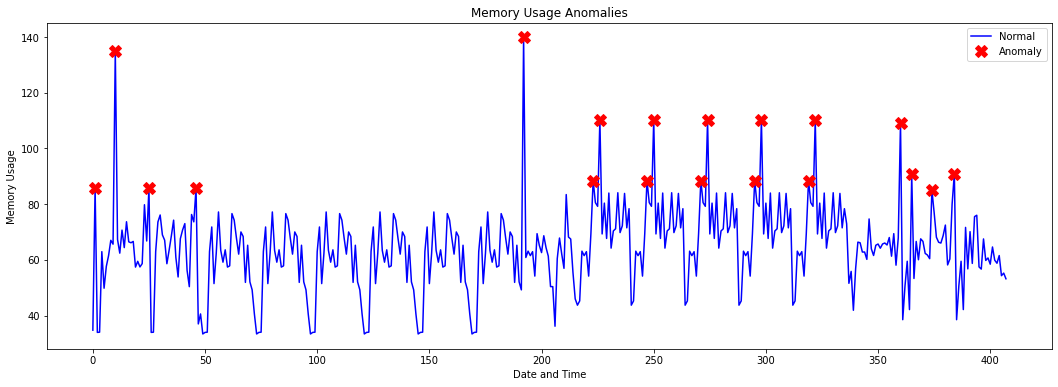

In [ ]:
# visualization
df03_h['anomaly_f'] = pd.Series(df03_h['anomaly_f'].values, index=df03_h.index)
a = df03_h.loc[df03_h['anomaly_f'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df03_h['Memoria Usata'], color='blue', label='Normal')
_ = plt.plot(a['Memoria Usata'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Memory Usage')
_ = plt.title('Memory Usage Anomalies')
_ = plt.legend(loc='best')
plt.show();

## Analysis

In [ ]:
anomaly_methods = ["Interquartile Range","K-Means", "Isolation Forest"]
anomaly_cols = ["anomaly", "anomaly_k", "anomaly_f"]
for i in range(len(anomaly_methods)):
  print("With {} Algoratihm, {} anomalies detected. It's {} of the total data.".format(anomaly_methods[i],df03_h[anomaly_cols[i]].value_counts()[1], df03_h[anomaly_cols[i]].value_counts()[1]/len(df03_h)))

With Interquartile Range Algoratihm, 8 anomalies detected. It's 0.0196078431372549 of the total data.
With K-Means Algoratihm, 29 anomalies detected. It's 0.07107843137254902 of the total data.
With Isolation Forest Algoratihm, 19 anomalies detected. It's 0.04656862745098039 of the total data.


### Anomalies Detected by all three algorithm

In [ ]:
df03_h.loc[(df03_h["anomaly"]==1) & (df03_h["anomaly_k"]==1) & (df03_h["anomaly_f"]==1)]

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly,anomaly_k,anomaly_f
10,2022-03-04 10:00:00,4601515.0,698995.696461,34408.660174,0.010065,0.0,134.952514,2.451288,410.363171,10.0,-2.0,134.952514,current,1,1,1
192,2022-03-12 00:00:00,5026367.5,443834.285714,2300.166667,0.000000,0.0,139.855000,1.285714,NaN,0.0,-2.0,139.855000,current,1,1,1
226,2022-03-13 10:00:00,5031223.5,409234.360465,3096.117647,0.000000,0.0,110.243663,2.843023,422.047619,10.0,-2.0,110.243663,current,1,1,1
250,2022-03-14 10:00:00,NaN,NaN,NaN,NaN,NaN,110.243663,NaN,NaN,NaN,NaN,110.243663,previous,1,1,1
274,2022-03-15 10:00:00,NaN,NaN,NaN,NaN,NaN,110.243663,NaN,NaN,NaN,NaN,110.243663,previous,1,1,1
298,2022-03-16 10:00:00,NaN,NaN,NaN,NaN,NaN,110.243663,NaN,NaN,NaN,NaN,110.243663,previous,1,1,1
322,2022-03-17 10:00:00,NaN,NaN,NaN,NaN,NaN,110.243663,NaN,NaN,NaN,NaN,110.243663,previous,1,1,1
360,2022-03-19 00:00:00,5269773.0,568564.000000,1537.333333,0.000000,0.0,109.223846,2.000000,NaN,0.0,-2.0,109.223846,current,1,1,1


In [ ]:
len(df03_h.loc[(df03_h["anomaly"]==1) & (df03_h["anomaly_k"]==1) & (df03_h["anomaly_f"]==1)])

8

In [ ]:
min(df03_h.loc[(df03_h["anomaly"]==1) & (df03_h["anomaly_k"]==1) & (df03_h["anomaly_f"]==1)]["Memoria Usata"]), max(df03_h.loc[(df03_h["anomaly"]==1) & (df03_h["anomaly_k"]==1) & (df03_h["anomaly_f"]==1)]["Memoria Usata"])

(109.22384615384614, 139.855)

### Anomalies Detected by Interquartile Range and K means

In [ ]:
df03_h.loc[(df03_h["anomaly"]==1) & (df03_h["anomaly_k"]==1) & (df03_h["anomaly_f"]==0)]


,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly,anomaly_k,anomaly_f


### Anomalies Detected by Interquartile Range and Isolation Forest

In [ ]:
df03_h.loc[(df03_h["anomaly"]==1) & (df03_h["anomaly_k"]==0) & (df03_h["anomaly_f"]==1)]

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly,anomaly_k,anomaly_f


In [ ]:
len(df03_h.loc[(df03_h["anomaly"]==1) & (df03_h["anomaly_k"]==0) & (df03_h["anomaly_f"]==1)])

0

### Anomalies Detected by only Interquartile Range

In [ ]:
df03_h.loc[(df03_h["anomaly"]==1) & (df03_h["anomaly_k"]==0) & (df03_h["anomaly_f"]==0)]

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly,anomaly_k,anomaly_f


### Anomalies Detected by K Means and Isolation Forest

In [ ]:
df03_h.loc[(df03_h["anomaly"]==0) & (df03_h["anomaly_k"]==1) & (df03_h["anomaly_f"]==1)]

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly,anomaly_k,anomaly_f
1,2022-03-04 01:00:00,NaN,NaN,NaN,NaN,NaN,85.859302,NaN,NaN,NaN,NaN,85.859302,next,0,1,1
25,2022-03-05 01:00:00,4.653389e+06,259112.790698,1.995654e+03,0.0,0.0,85.859302,2.372093,500.000000,1.0,-2.0,85.859302,current,0,1,1
46,2022-03-05 22:00:00,4.661868e+06,5919.238095,2.723333e+02,0.0,0.0,85.792857,3.714286,404.000000,22.0,-2.0,85.792857,current,0,1,1
223,2022-03-13 07:00:00,5.030826e+06,372084.206250,3.805529e+03,0.0,0.0,88.510813,2.418750,407.840000,7.0,-2.0,88.510813,current,0,1,1
247,2022-03-14 07:00:00,NaN,NaN,NaN,NaN,NaN,88.510813,NaN,NaN,NaN,NaN,88.510813,previous,0,1,1
271,2022-03-15 07:00:00,NaN,NaN,NaN,NaN,NaN,88.510813,NaN,NaN,NaN,NaN,88.510813,previous,0,1,1
295,2022-03-16 07:00:00,NaN,NaN,NaN,NaN,NaN,88.510813,NaN,NaN,NaN,NaN,88.510813,previous,0,1,1
319,2022-03-17 07:00:00,NaN,NaN,NaN,NaN,NaN,88.510813,NaN,NaN,NaN,NaN,88.510813,previous,0,1,1
365,2022-03-19 05:00:00,5.269899e+06,334015.222222,1.279286e+03,0.0,0.0,90.730000,1.666667,403.000000,5.0,-2.0,90.730000,current,0,1,1
374,2022-03-19 14:00:00,5.272675e+06,418107.164948,2.423710e+06,0.0,0.0,85.029278,3.085911,431.894737,14.0,-2.0,85.029278,current,0,1,1


In [ ]:
len(df03_h.loc[(df03_h["anomaly"]==0) & (df03_h["anomaly_k"]==1) & (df03_h["anomaly_f"]==1)])

11

In [ ]:
min(df03_h.loc[(df03_h["anomaly"]==0) & (df03_h["anomaly_k"]==1) & (df03_h["anomaly_f"]==1)]["Memoria Usata"]), max(df03_h.loc[(df_h["anomaly"]==0) & (df03_h["anomaly_k"]==1) & (df03_h["anomaly_f"]==1)]["Memoria Usata"])

(85.02927835051547, 139.855)

### Anomalies Detected by only K Means

In [ ]:
df03_h.loc[(df03_h["anomaly"]==0) & (df03_h["anomaly_k"]==1) & (df03_h["anomaly_f"]==0)]

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly,anomaly_k,anomaly_f
230,2022-03-13 14:00:00,5031516.5,289005.987805,3579.355556,0.0,0.0,84.011341,2.512195,430.857143,14.0,-2.0,84.011341,current,0,1,0
234,2022-03-13 18:00:00,5032350.0,364190.944625,2917.679245,0.0,0.0,84.118893,1.885993,408.181818,18.0,-2.0,84.118893,current,0,1,0
254,2022-03-14 14:00:00,NaN,NaN,NaN,NaN,NaN,84.011341,NaN,NaN,NaN,NaN,84.011341,previous,0,1,0
258,2022-03-14 18:00:00,NaN,NaN,NaN,NaN,NaN,84.118893,NaN,NaN,NaN,NaN,84.118893,previous,0,1,0
278,2022-03-15 14:00:00,NaN,NaN,NaN,NaN,NaN,84.011341,NaN,NaN,NaN,NaN,84.011341,previous,0,1,0
282,2022-03-15 18:00:00,NaN,NaN,NaN,NaN,NaN,84.118893,NaN,NaN,NaN,NaN,84.118893,previous,0,1,0
302,2022-03-16 14:00:00,NaN,NaN,NaN,NaN,NaN,84.011341,NaN,NaN,NaN,NaN,84.011341,previous,0,1,0
306,2022-03-16 18:00:00,NaN,NaN,NaN,NaN,NaN,84.118893,NaN,NaN,NaN,NaN,84.118893,previous,0,1,0
326,2022-03-17 14:00:00,NaN,NaN,NaN,NaN,NaN,84.011341,NaN,NaN,NaN,NaN,84.011341,previous,0,1,0
330,2022-03-17 18:00:00,NaN,NaN,NaN,NaN,NaN,84.118893,NaN,NaN,NaN,NaN,84.118893,previous,0,1,0


In [ ]:
len(df03_h.loc[(df03_h["anomaly"]==0) & (df03_h["anomaly_k"]==1) & (df03_h["anomaly_f"]==0)])

10

In [ ]:
min(df03_h.loc[(df03_h["anomaly"]==0) & (df03_h["anomaly_k"]==1) & (df03_h["anomaly_f"]==0)]["Memoria Usata"]), max(df03_h.loc[(df03_h["anomaly"]==0) & (df03_h["anomaly_k"]==1) & (df03_h["anomaly_f"]==0)]["Memoria Usata"])

(84.01134146341464, 84.11889250814332)

### Anomalies Detected by only Isolation Forest

In [ ]:
df03_h.loc[(df03_h["anomaly"]==0) & (df03_h["anomaly_k"]==0) & (df03_h["anomaly_f"]==1)]

,Timestamp,Session ID,User ID,Elapsed Time,Proxied,Compromesso,Memoria Usata,Qualita Rete,Status Errore,h,memory_flag,filled,filled_tag,anomaly,anomaly_k,anomaly_f


In [ ]:
len(df03_h.loc[(df03_h["anomaly"]==0) & (df03_h["anomaly_k"]==0) & (df03_h["anomaly_f"]==1)])

0

In [ ]:
min(df03_h.loc[(df03_h["anomaly"]==0) & (df03_h["anomaly_k"]==0) & (df03_h["anomaly_f"]==1)]["Memoria Usata"]), max(df03_h.loc[(df03_h["anomaly"]==0) & (df03_h["anomaly_k"]==0) & (df03_h["anomaly_f"]==1)]["Memoria Usata"])

ValueError: ignored

### Summary

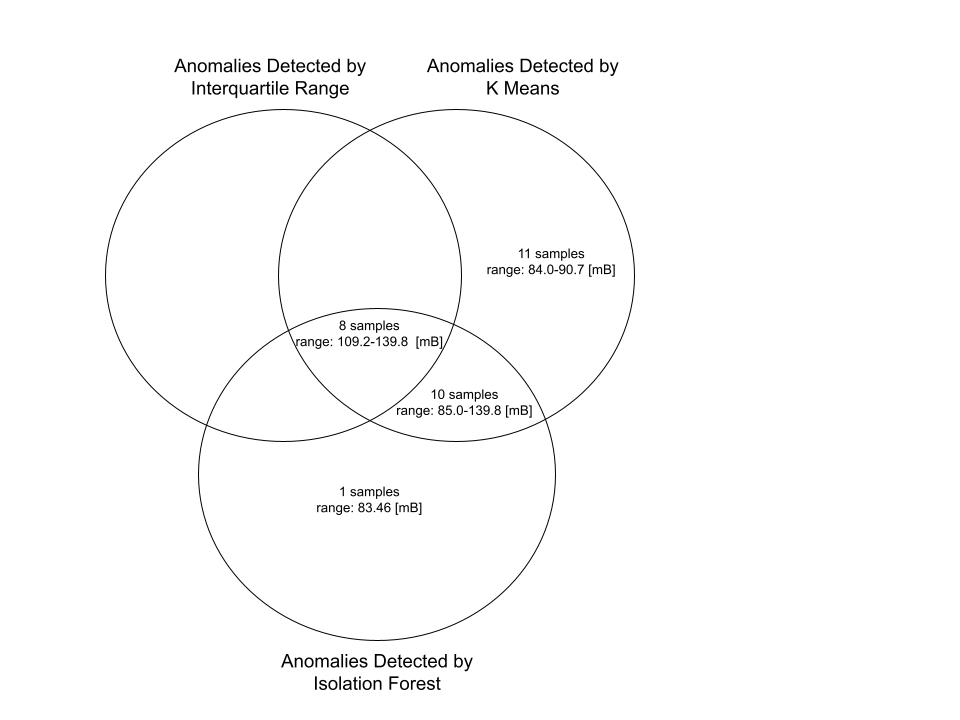